<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Scaler_BusinessCase_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'blue'>Problem Statement</font>

Scaler (a product of InterviewBit) is an online tech university that offers intensive Computer Science & Data Science courses, that are delivered live by industry experts and tech leaders. The curriculum is structured to equip software professionals with the latest skills & technologies.

As a Data Scientist:

> **Focus**: Profiling top companies & job positions from Scaler's database.

> **Given**: learner's data with details on job profile, company, and other attributes.

> **Task**: Cluster learners into groups based on similar characteristics.

> **Goal**: It is to ensure that each cluster represents a cohesive group of individuals with shared traits.


# <font color = 'blue'>Exploratory Data Analysis</font>

In [ ]:
#Import the necessary library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the csv file and displaying top 10 records
df = pd.read_csv('scaler_clustering.csv')
df.head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
5,5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0
6,6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0
7,7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
8,8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0


In [ ]:
#shape of the data
df.shape

(205843, 7)

There scaler dataset consists of 205843 records with 7 columns in it.

In [ ]:
#Understanding the basic information about the scaler dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


The dataset consists of 7 columns with 205843 records which index's from 0 to 205842. The dataset contains 2 float columns, 2 integer columns and 3 columns of object datatype. Furthermore, the dataset suffer from missing values. Columns such as company_hash, orgyear and job_position are prone to missing values. Finally, the memory usage of the scaler dataset is around 11.0+ MB.

In [ ]:
#Conversion of object column into categorical column
df['job_position'] = df['job_position'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        205843 non-null  int64   
 1   company_hash      205799 non-null  object  
 2   email_hash        205843 non-null  object  
 3   orgyear           205757 non-null  float64 
 4   ctc               205843 non-null  int64   
 5   job_position      153279 non-null  category
 6   ctc_updated_year  205843 non-null  float64 
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 9.9+ MB


The data type of the job position has changed to category.

In [ ]:
#NULL value detection.
df.isnull().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


The attribute company_hash consists of 44 missing values. The orgyear contains 86 missing values and job_position contains 52564 missing values. It is clear from the above table that the job_position consists of higher number of missing values compared to the others.

In [ ]:
#statistical summary of the scaler dataset.
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


The statistical summary of the above table reveals the following.

**Unnamed: 0** - A column name that act as a serial number starting from 0. This column does not have any impact neither on the ML algorithm nor on the data analysis. As a result we can drop it out.

**orgyear** - The employment start date has a mean of 2014 with the minimum value as 0 and the maximum value as 20165. The max orgyear is so hypothetical such that we have to consider some data cleansing.

**ctc** - ctc or Cost to Company is a powerful attribute in determining the top companies and top job positions. The average ctc is 2.271685e+06, while the minimum ctc value is 2.000000e+00 and the maximum ctc is given by 1.000150e+09.

**ctc_updated_year** - The ctc updated year has a mean of 2019 with the minimum value as 2015 and the maximum value as 2021.

In [ ]:
#statistical summary of the scaler dataset including object and categorical variables.
df.describe(include=['category','object'])

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


**company_hash** - It contains 205799 values with 37299 unique copany_hash values and the top one is shown in the above table with 8337 times it has occured.

**email_hash** - Anonymoused email value with 153443 unique values and top most frequent (10 times) email value is given in the above table.

**job_position** - There's only 153279 values present for this attribute and out of which 1016 unique values are present. Furthermore, the Backend Engineer is the most frequent value that has occured 43554 times in the given scaler dataset.

#<font color='blue'>Univariate Analysis</font>

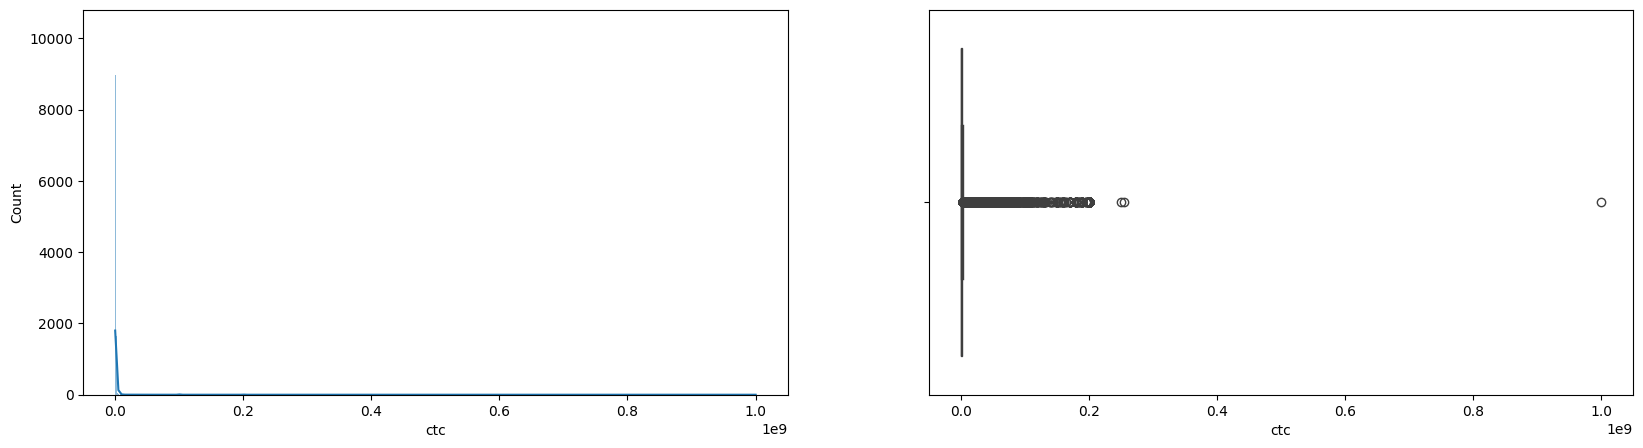

In [ ]:
#Histogram and boxplot to depict the distribution of the ctc.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.histplot(data=df, x="ctc", kde=True, ax=ax[0])
sns.boxplot(data=df, x="ctc", ax=ax[1])
plt.show()

From the 2 graphs we can say that there's a lot of outliers in the ctc columns and it is extremely difficult to interpret the distribution of the ctc. To understand the behaviour of this column we should perform some outlier treatments.

In [ ]:
#Calculation of outliers using IQR method
q1, q3 = df['ctc'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_outliers = df[df['ctc'] < lower_bound]
upper_outliers = df[df['ctc'] > upper_bound]
print("lower outliers count :", lower_outliers.shape[0])
print("upper outliers count :", upper_outliers.shape[0])
print("total outliers count :", lower_outliers.shape[0] + upper_outliers.shape[0])
print("% of outliers        :", np.round((lower_outliers.shape[0] + upper_outliers.shape[0]) / df.shape[0] * 100,2))

lower outliers count : 0
upper outliers count : 13127
total outliers count : 13127
% of outliers        : 6.38


In [ ]:
#Removing the outliers
df = df[(df['ctc'] >= lower_bound) & (df['ctc'] <= upper_bound)]
df.shape

(192716, 7)

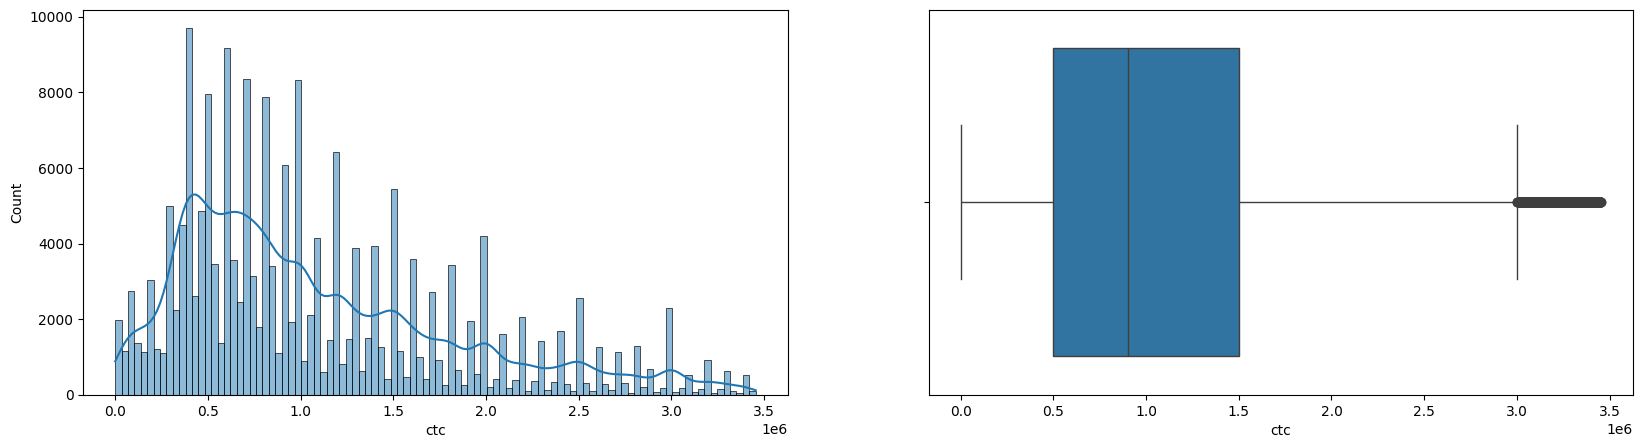

In [ ]:
#Histogram and boxplot to depict the distribution of the ctc after outlier removal
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.histplot(data=df, x="ctc", kde=True, ax=ax[0])
sns.boxplot(data=df, x="ctc", ax=ax[1])
plt.show()

As we can see from the left side of the plot that the histogram of the ctc follows a right tailed trend. It is also observed that the ctc fluctuates from 0.0xle6 to 3.4xle6.

The right hand side of the plot (Box-plot) shows the median of the ctc lies around 0.9xle6. This is crucial for our analysis as we have already figured out that the distribution of ctc follows a right skewed nature.

lower outliers count : 5657
upper outliers count : 24
total outliers count : 5681
% of outliers        : 2.95


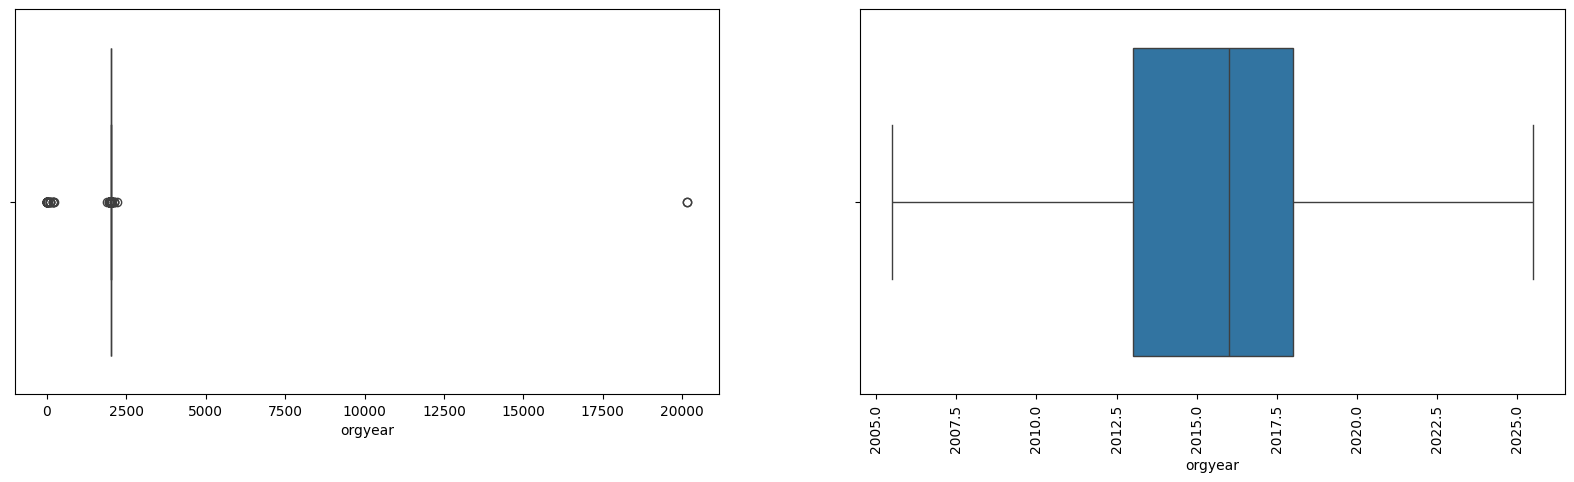

In [ ]:
#Box-plot for the orgyear
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=df, x='orgyear', ax=ax[0])

#------Calculation of the outliers------
Q1, Q3= df['orgyear'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_outliers = df[df['orgyear'] < lower_bound]
upper_outliers = df[df['orgyear'] > upper_bound]
print("lower outliers count :", lower_outliers.shape[0])
print("upper outliers count :", upper_outliers.shape[0])
print("total outliers count :", lower_outliers.shape[0] + upper_outliers.shape[0])
print("% of outliers        :", np.round((lower_outliers.shape[0] + upper_outliers.shape[0]) / df.shape[0] * 100,2))

#------Capping the outliers for the orgyear column------
df['orgyear'] = np.where(df['orgyear'] < lower_bound, lower_bound, df['orgyear'])
df['orgyear'] = np.where(df['orgyear'] > upper_bound, upper_bound, df['orgyear'])

#------Box-plot for the orgyear after capping------
sns.boxplot(data=df, x='orgyear', ax=ax[1])
plt.xticks(rotation=90)
plt.show()

The left side of the plot illustrates that the orgyear has a lot of outliers and it is really hard to figure out some justifiable statements. Now, the right side of the plot is exact representation of the box plot for the orgyear after removing the outliers from it. The median of the orgyear lies around 2016, while the min and max values for the same is 2005 and 2025 respectively.

# <font color='blue'> Bi-variate Analysis </font>

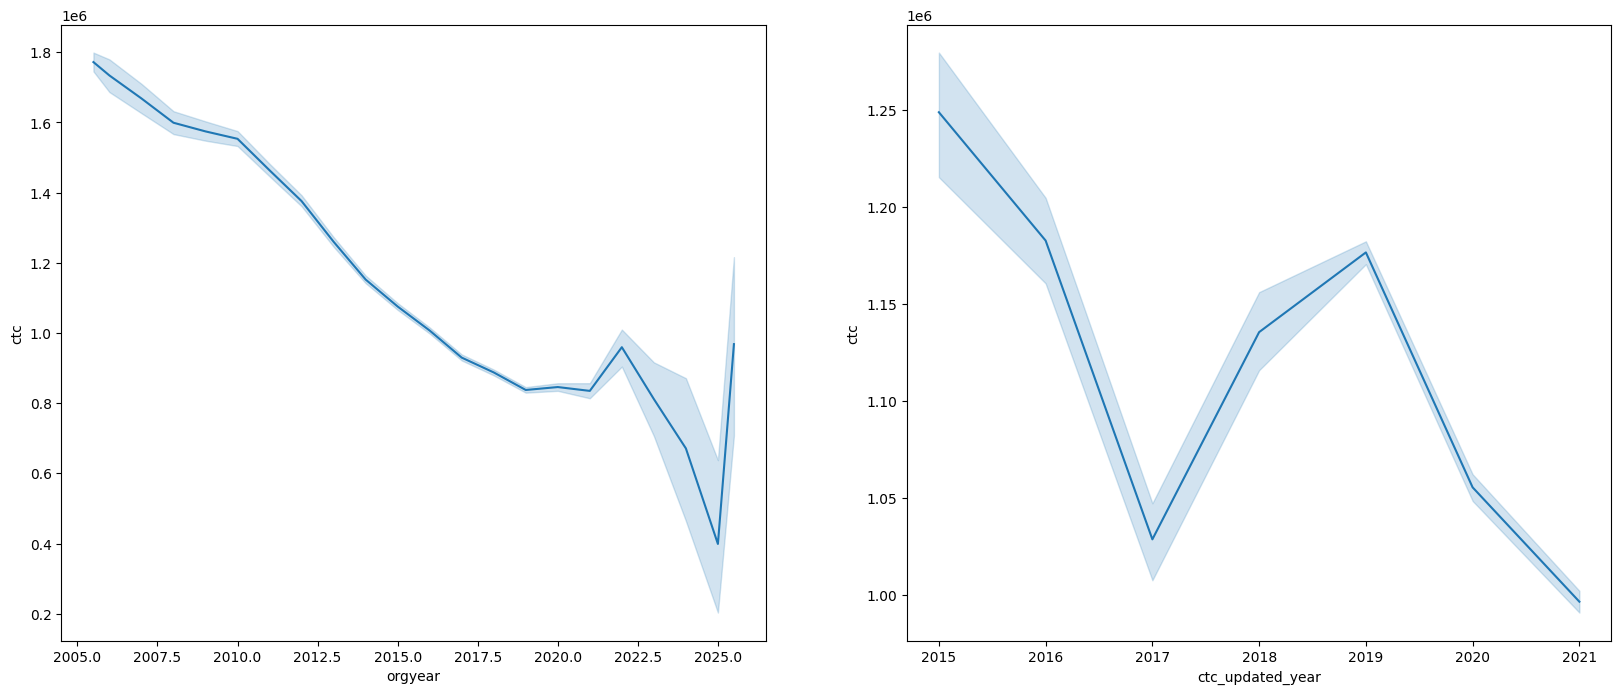

In [ ]:
#line plot to illustrate the changes in ctc over the orgyear and ctc_updated_year
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.lineplot(x=df['orgyear'], y=df['ctc'], ax=ax[0])
sns.lineplot(x=df['ctc_updated_year'], y=df['ctc'], ax=ax[1])
plt.show()

The left-side graph shows that how ctc has changed over the time and it says that during the period of 2020 - 2025 there's spike in the current ctc.The ctc_updated_year vs ctc shows that the ctc has increased from 2017 onwards till 2019 and it steadly decreases through 2021. Notably, the ctc starts to update from the year 2015 onwards. To some extent we can trust this because we also need to consider the fact that we have eliminated some outliers from ctc in scaler dataset.

In [ ]:
#Creating a new column named years of experience which is the difference between current_year - orgyear
import datetime as dt
df['Years of Experience'] = dt.datetime.now().year - df['orgyear']
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,9.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,7.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,10.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,8.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,8.0


In [ ]:
#Conversion of floating point column into integer column for orgyear

df['orgyear'] = df['orgyear'].fillna(-1.0) # Replace NaN with a placeholder -1.0

df['orgyear'] = np.floor(df['orgyear']).astype(int) # Optionally, replace -1.0 with NaN again if needed

df['orgyear'] = df['orgyear'].replace(-1.0, np.nan) # Reversing the placeholder with nan

#Conversion of floating point column into integer column for ctc_updated_year

df['ctc_updated_year'] = df['ctc_updated_year'].fillna(-1.0)

df['ctc_updated_year'] = np.floor(df['ctc_updated_year']).astype(int)

df['ctc_updated_year'] = df['ctc_updated_year'].replace(-1.0, np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192716 entries, 0 to 205842
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Unnamed: 0           192716 non-null  int64   
 1   company_hash         192674 non-null  object  
 2   email_hash           192716 non-null  object  
 3   orgyear              192638 non-null  float64 
 4   ctc                  192716 non-null  int64   
 5   job_position         142753 non-null  category
 6   ctc_updated_year     192716 non-null  int64   
 7   Years of Experience  192638 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 12.2+ MB


In [ ]:
#One of the data preprocessing technique to strip out unwanted special characters from company hash, email hash and job positions
import re
df['company_hash'] = df['company_hash'].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
df['email_hash'] = df['email_hash'].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
df['job_position'] = df['job_position'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)).strip() if pd.notna(x) else x)
df['job_position'] = df['job_position'].replace('', np.nan)
df['job_position'] = df['job_position'].str.lower()
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0


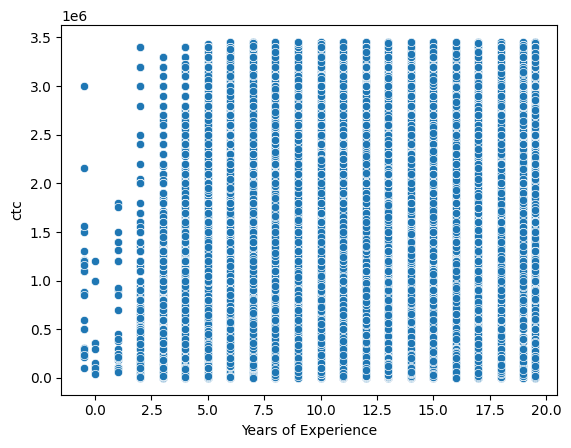

In [ ]:
#Scatterplot for years of experience vs ctc
sns.scatterplot(x=df['Years of Experience'], y=df['ctc'])
plt.show()

We can see that from the above figure that people with experiance more than 2 acquire ctc between 0.05 x le9 to 3.5 x le6. We can also confirm that employees with experience less than 2 years is acquiring a ctc around 1.5 x le6. A very few employees with less than 2 years of experience earning more than 1.5 x le6 ctc.

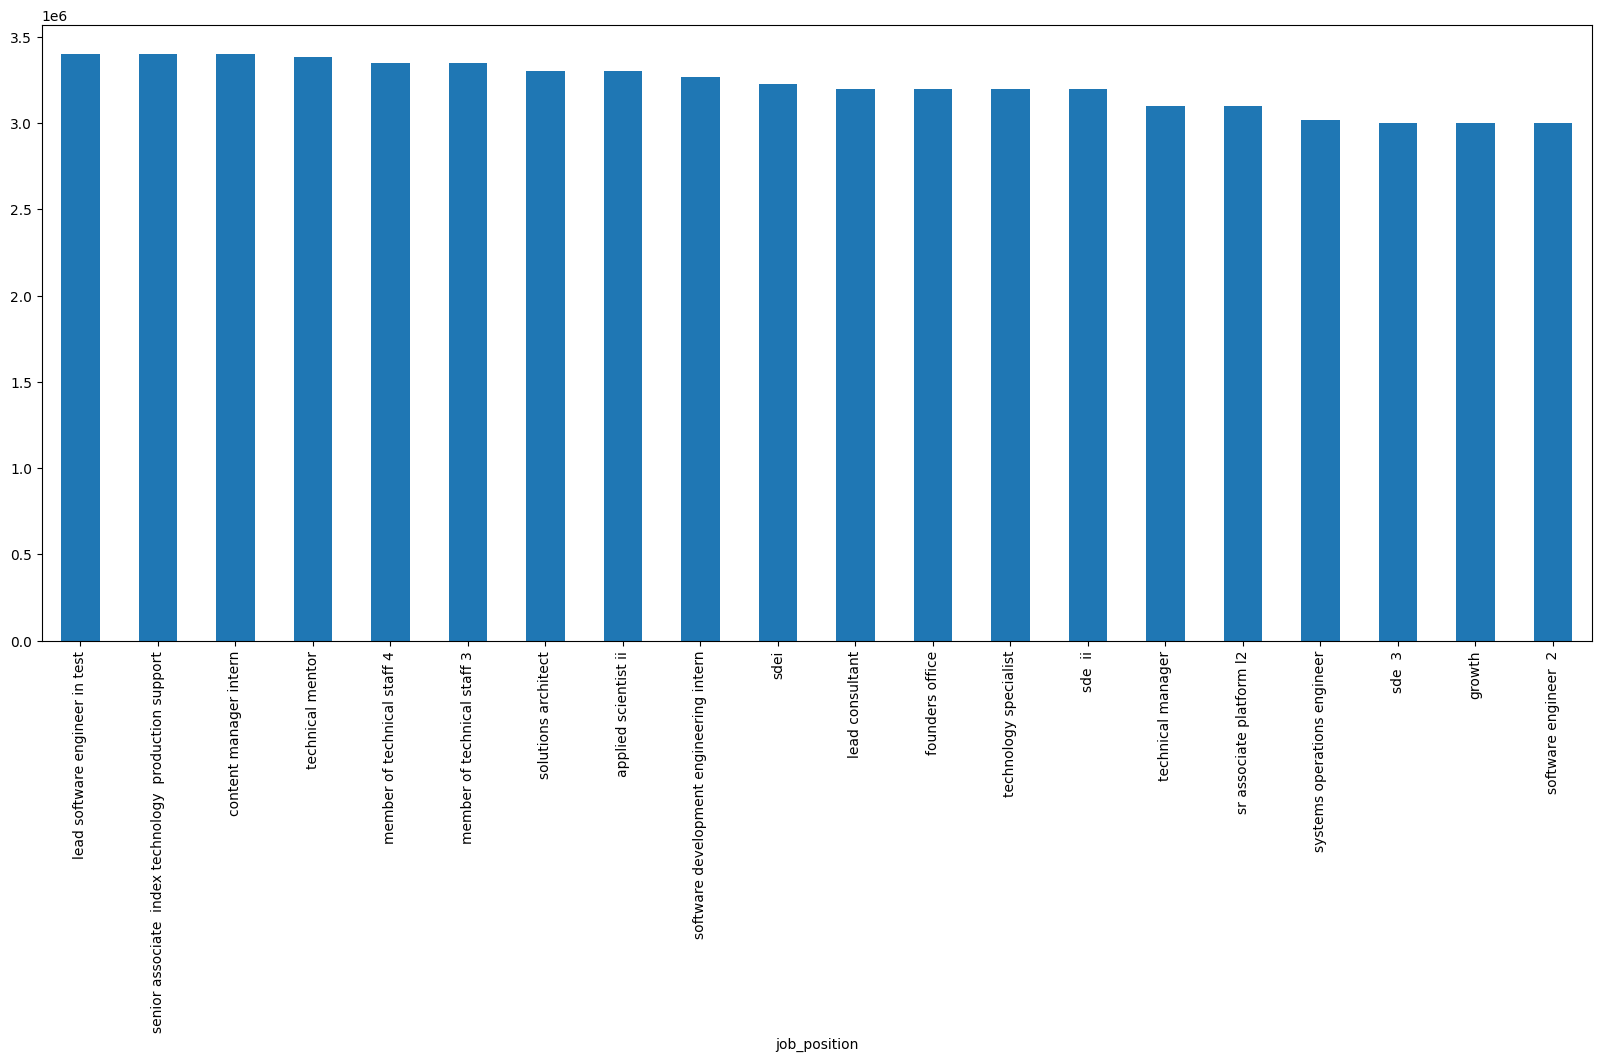

In [ ]:
#Average ctc based on different job positions
plt.figure(figsize=(20,8))
df.groupby('job_position',observed=False)['ctc'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

These are the 20 job positions with highest amount of mean ctc. These job positions are lead software engineer in test, content manager intern, senior associate, technical mentor, and so on. An individual who is aquiring these job titles can earn a decent amount of income per annum.

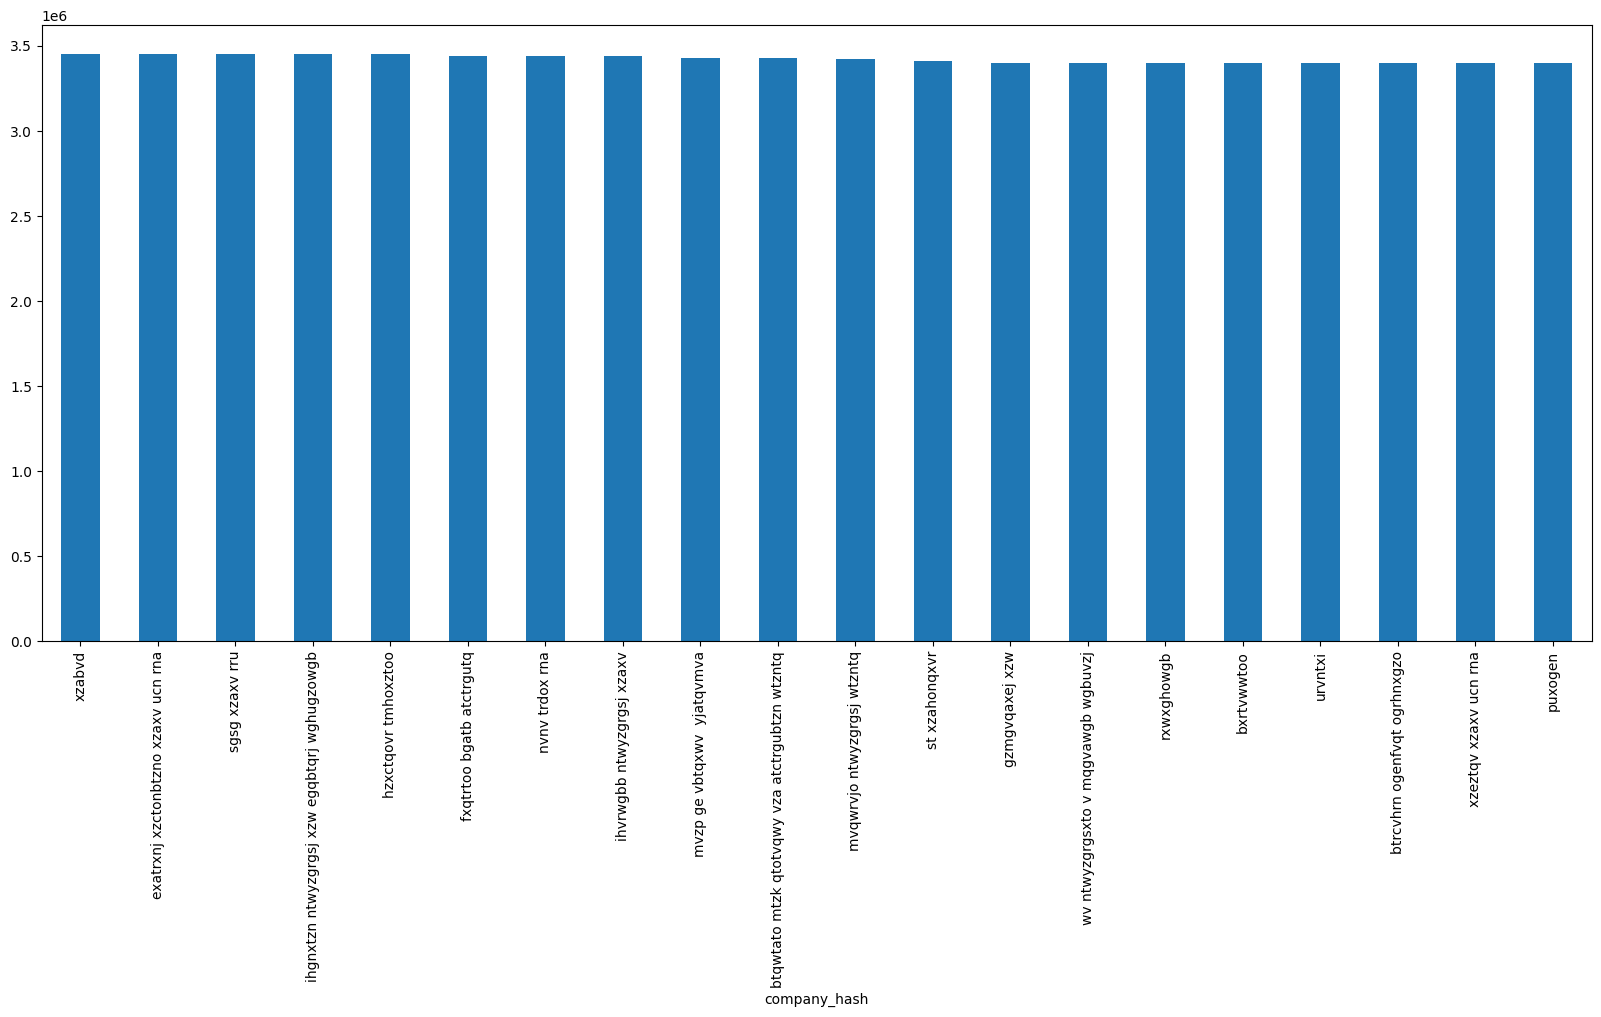

In [ ]:
#Median ctc based on different companies
plt.figure(figsize=(20,8))
df.groupby('company_hash',observed=False)['ctc'].median().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

Since company names are hashed values we cannot figure out what exactly the names of each company. These top 20 companies offers decent ctc for their employees.

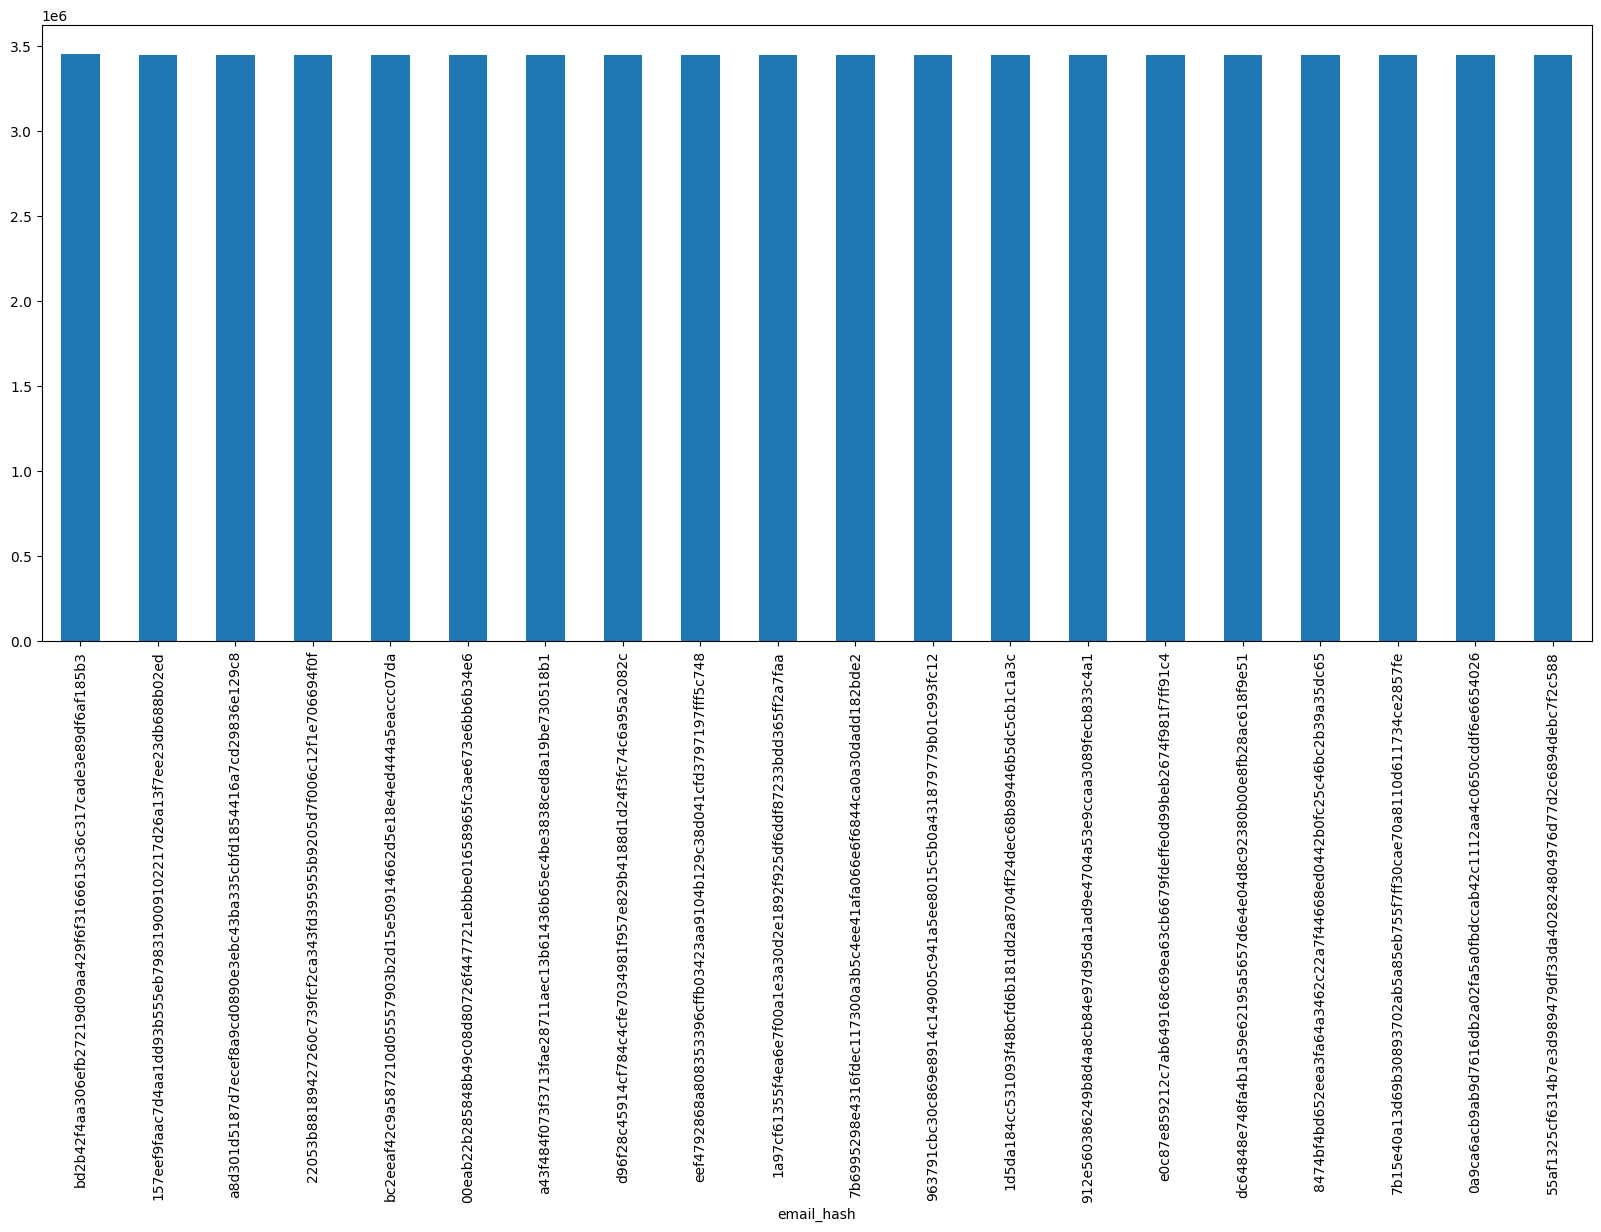

In [ ]:
#Median ctc based on different emails
plt.figure(figsize=(20,8))
df.groupby('email_hash',observed=False)['ctc'].median().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

The email is a sensitive information which is also masked such that we cannot figure out which company does they belongs to. The graph is somewhat similar to that of company_hash vs ctc.We can assume that these top 20 companies and emails are same and offers a decent ctc for their employees.

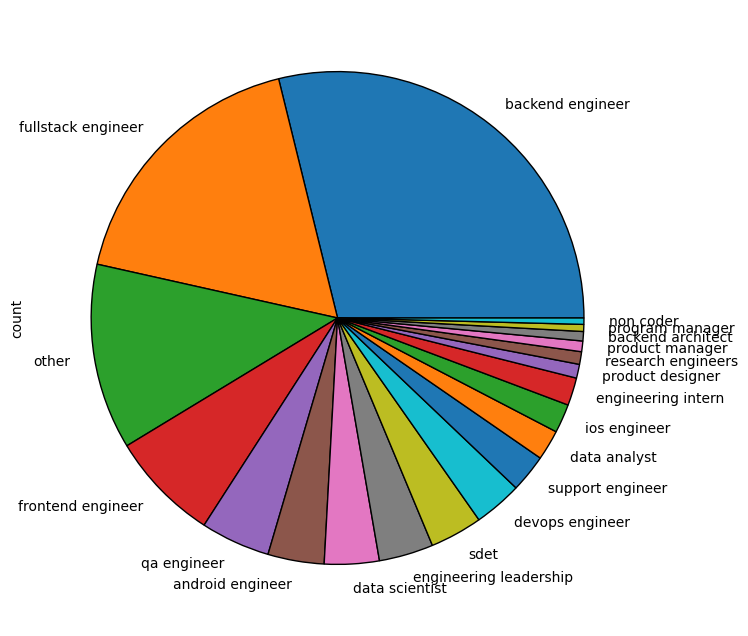

In [ ]:
#Top 20 job positions available in the scaler dataset.
plt.figure(figsize=(20,8))
df['job_position'].value_counts(dropna=True).head(20).plot(kind='pie', wedgeprops = {'edgecolor':'black'})
plt.show()

The above figure shows top 20 job positions available dataset. From this top 20 we can see that Backend Engineer, fullstack engineer, and Frontend engineer are some of the top job positions available in the scaler dataset.

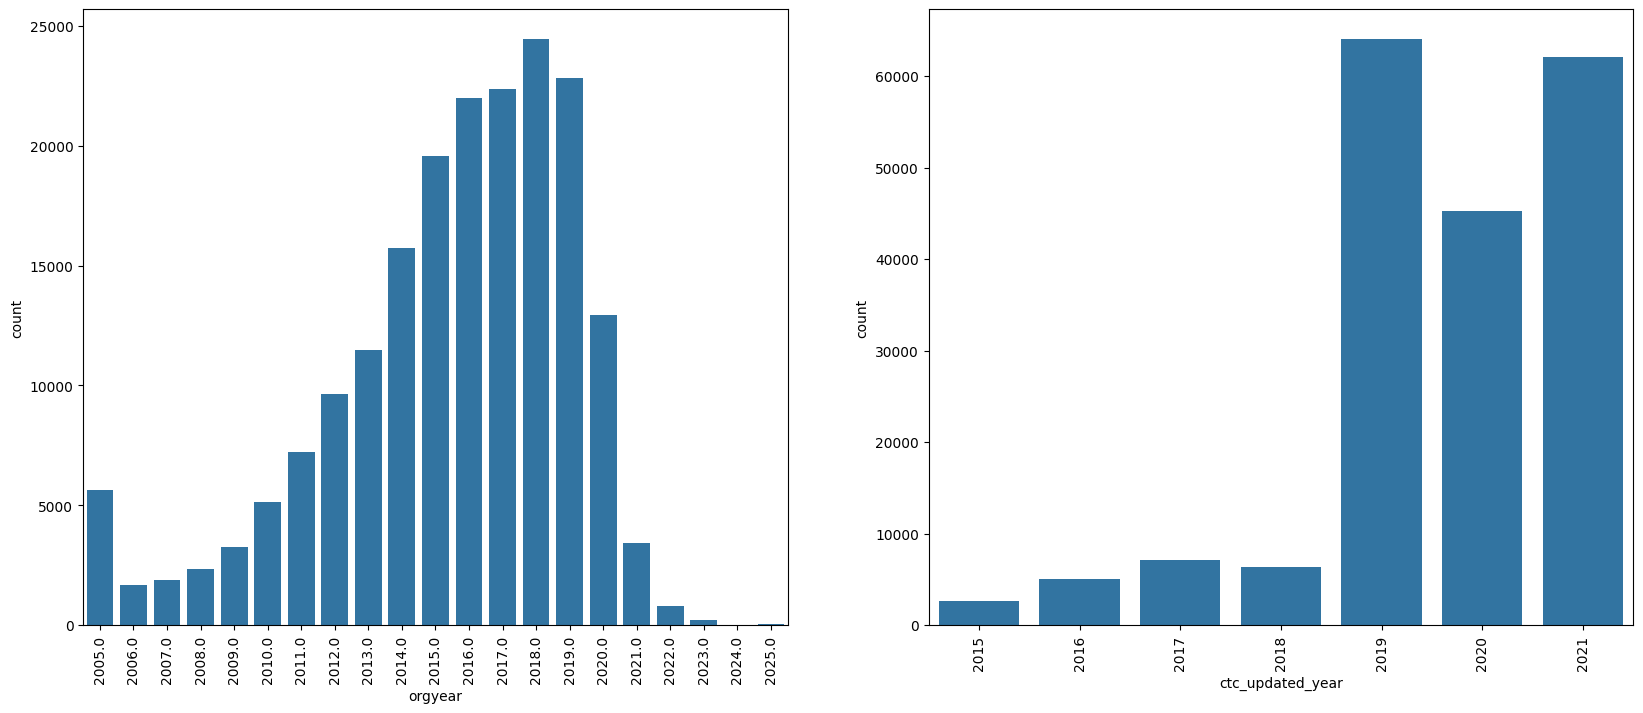

In [ ]:
#Bargraph for the illustartion of orgyear and ctc updated year
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(x=df['orgyear'], ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
sns.countplot(x=df['ctc_updated_year'], ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

The left side graph illustrates the most frequent year is 2018 with 25,000 of occurance, and the least frequent one is 2025. Furthermore, the graph one the right hand side shows the most frequent ctc_updated_year is 2019 with over 60,000 occurance, which shows that most of the ctc's are updated in 2019.

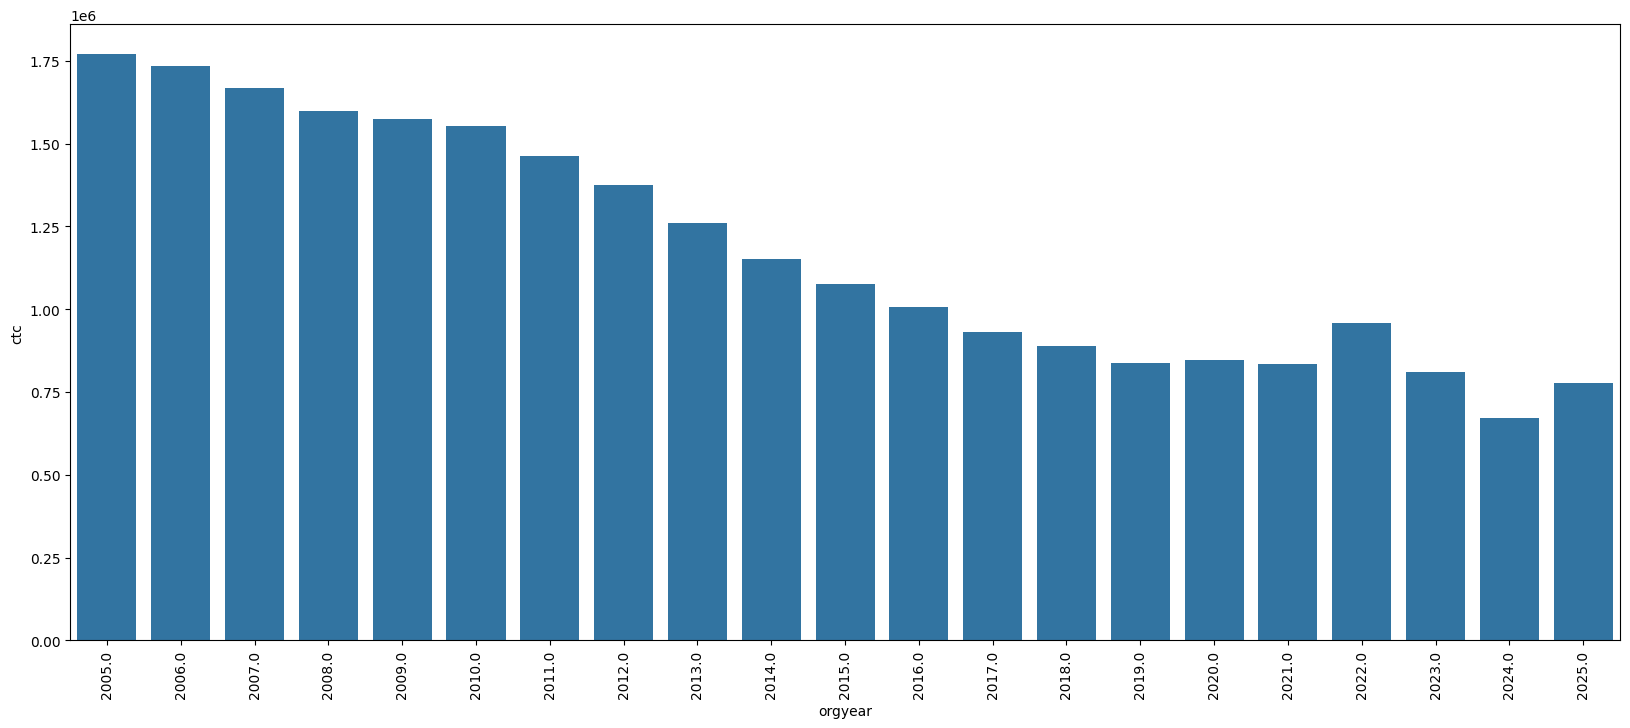

In [ ]:
#Average ctc based on orgyear
plt.figure(figsize=(20,8))
temp = df.groupby('orgyear',observed=False)['ctc'].mean().reset_index()
sns.barplot(x=temp['orgyear'], y=temp['ctc'])
plt.xticks(rotation=90)
plt.show()

The average ctc is quite high in 2005 with around 1.75 x le6. This starts to decrease gradually through 2021 and increased in 2022 which further decreases in 2023 and in 2024 and again increased in 2025.

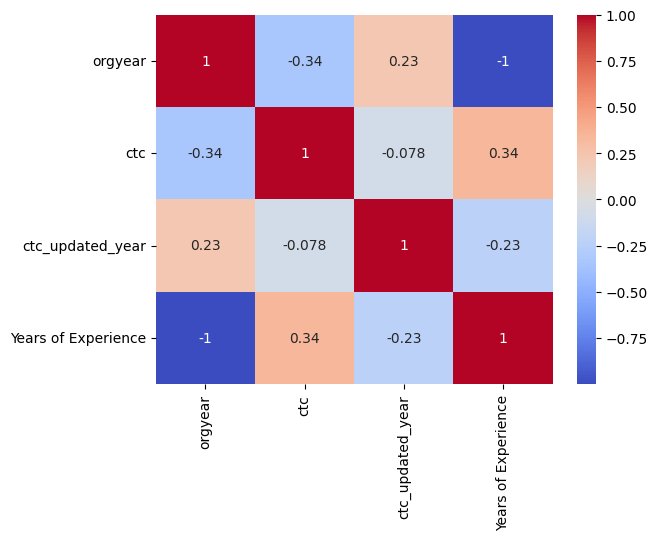

In [ ]:
#Correlation plot between numerical attributes.
cols = df.select_dtypes(include=['int64','float64']).columns
temp_df = df[cols]
temp_df = temp_df.drop('Unnamed: 0', axis=1)
sns.heatmap(temp_df.corr(), cmap='coolwarm', annot=True)
plt.show()

As we can see that almost all the variables are weakly correlated with each other except years of experience and orgyear. From the above figure it is clear that orgyear and years of experience is negatively correlated.

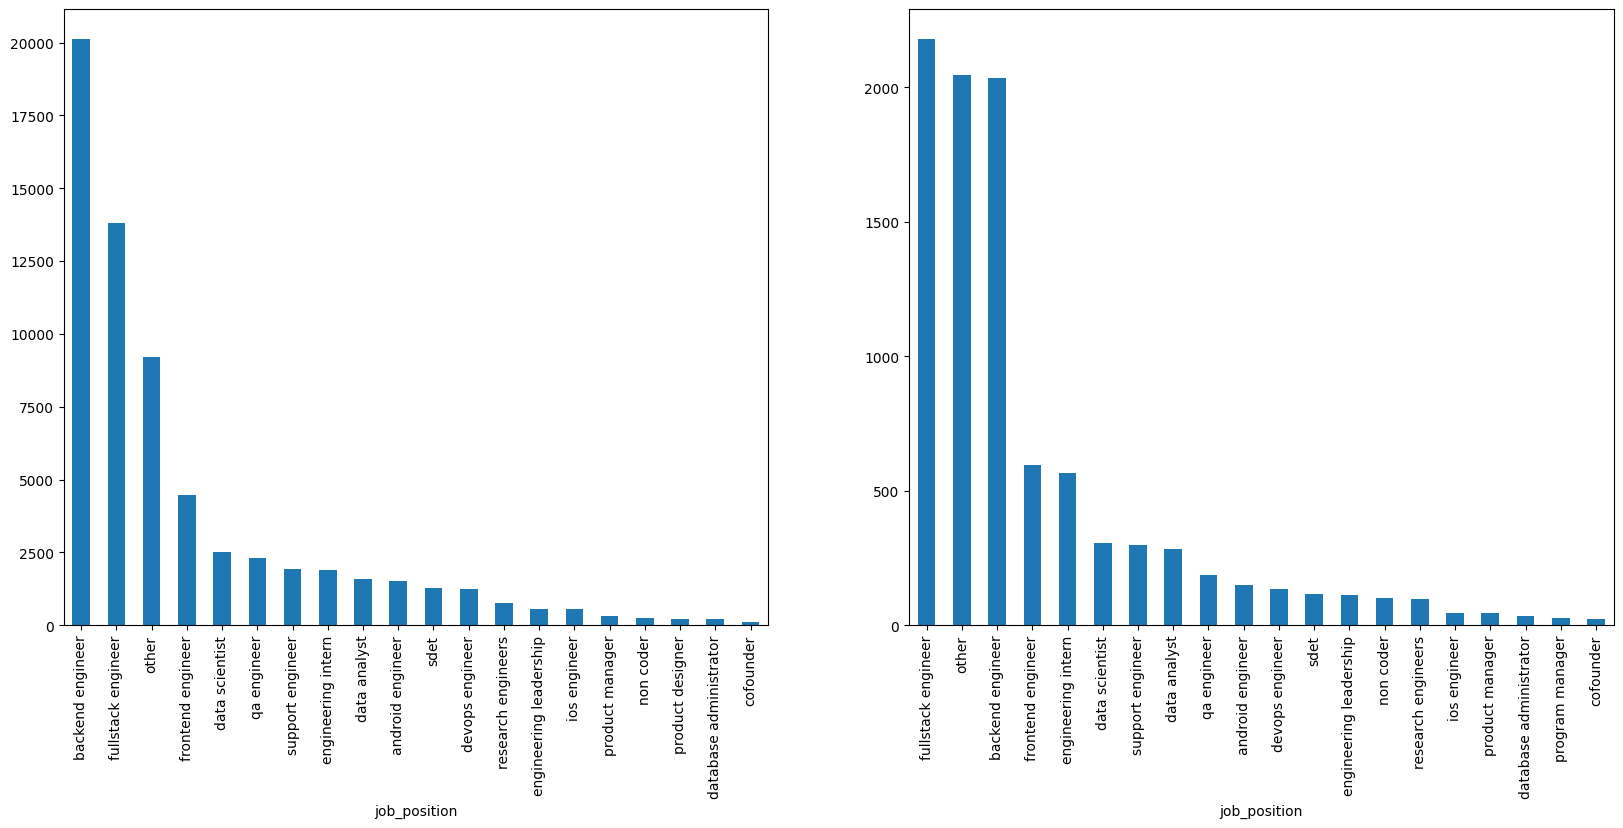

In [ ]:
#Checking the trends of top 20 jobs before and after 2020.
job_positions_before_2020 = df[(df['orgyear'] < 2020)&(df['orgyear'] > 2015)]
job_positions_after_2020 = df[df['orgyear'] >= 2020]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
job_positions_before_2020['job_position'].value_counts().head(20).plot(kind='bar', ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
job_positions_after_2020['job_position'].value_counts().head(20).plot(kind='bar', ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

The above graph shows an assesment of top 20 job titles available in scaler dataset before and after 2020. The left side graph shows most frequent jobs between 2015 to 2019 and the right side of the graph shows most frequent jobs between 2020 to 2025. Most of the job positions are available in these two graphs and one of the interesting thing to note here is that job opportunities has been reduced after 2020. For instance, backend engineer has approximately 20000 vacancies before 2020 and around 2000 vacancies are available after 2020. One possible reason for this sudden fall could be due to COVID-19. Similarly, fullstack engineer, approximately 12,500 vacancies are available before 2020 and after 2020 we can see that there's only 2500 vacancies available.

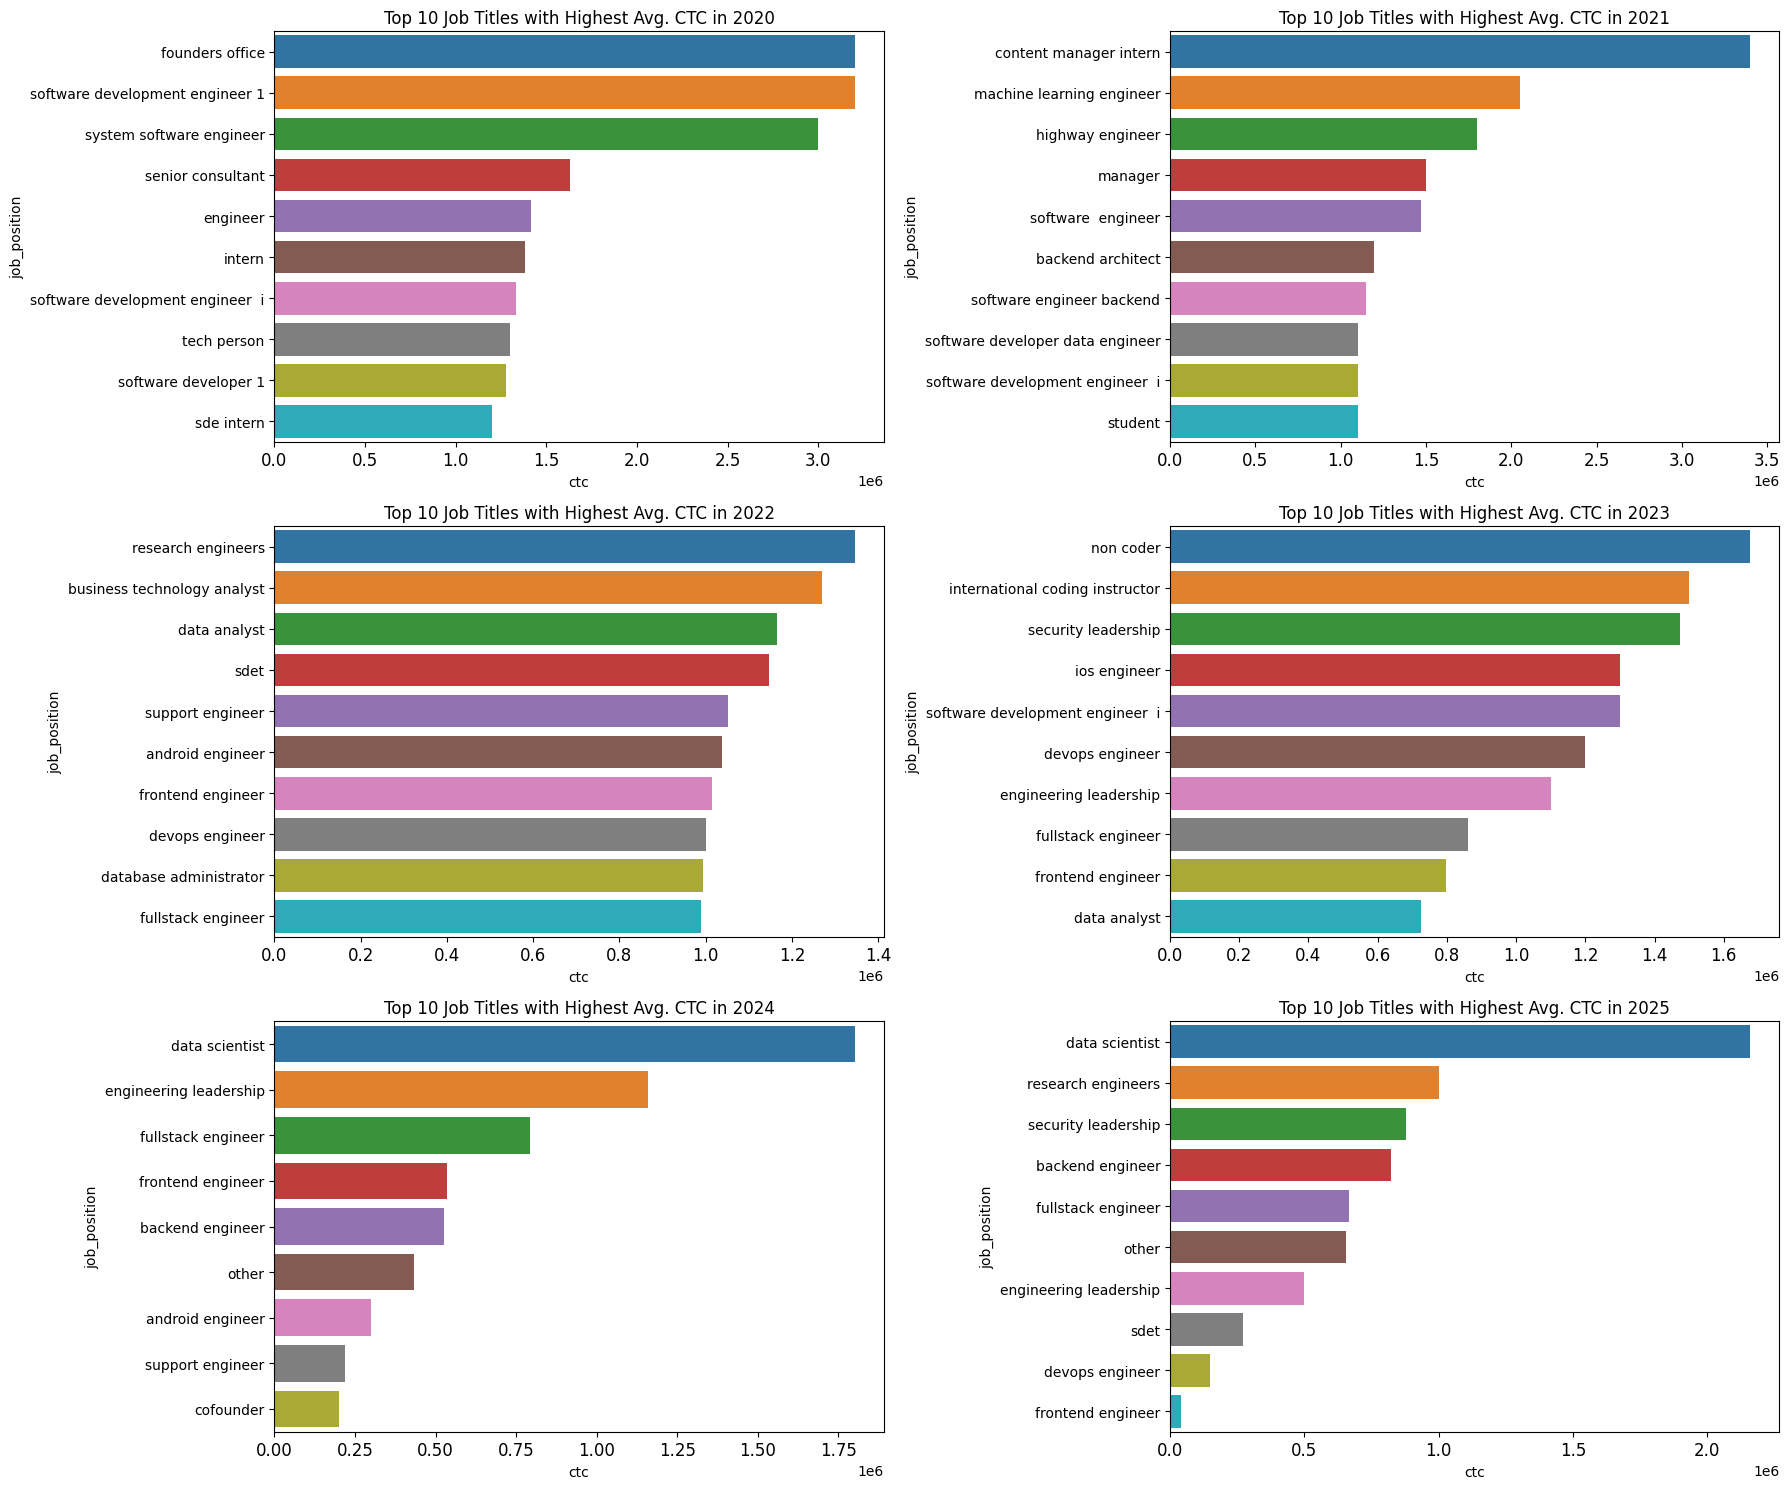

In [ ]:
# Highest paying jobs after 2020 throughout 2025
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))  # 3x2 grid
years = sorted(job_positions_after_2020['orgyear'].unique())

for i, year in enumerate(years):
    temp = job_positions_after_2020[job_positions_after_2020['orgyear'] == year] \
           .groupby('job_position', observed=False)['ctc'].mean().nlargest(10).reset_index()
    temp['job_position'] = temp['job_position'].str.strip()  # Clean job titles

    row, col = divmod(i, 2)  # Convert index to row & column position
    sns.barplot(x='ctc', y='job_position', hue='job_position', data=temp, ax=axes[row, col])

    axes[row, col].set_title(f"Top 10 Job Titles with Highest Avg. CTC in {int(year)}")
    axes[row, col].tick_params(axis='x', labelsize=12)  # Rotate for readability

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Highest Paying Jobs from 2020 to 2025

In 2020, the highest-paid professionals were those in the Founder’s Office, meaning individuals who started their own businesses earned the highest CTC. In 2021, Content Managers took the lead in earnings. Moving forward, Research Engineers saw a significant rise in salaries in 2022, surpassing other roles. Surprisingly, in 2023, non-coding professionals emerged as the top earners. Finally, in both 2024 and 2025, Data Scientists climbed to the top of the list, securing the highest CTC among all job roles.

Software Engineers, Frontend developers, backend developers, and fullstack engineers are some of the roles that are readly available in all the years from 2020 to 2025.

#<font color = 'blue'> Data-Preprocessing </font>

In [ ]:
#Dropping the unwanted columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0


###<font color='blue'>Outlier treatment and removal of special characters are done in the data visualisation part.</font>

###<font color='blue'> Duplicate value checks</font>

In [ ]:
#checking for duplicate values
df.duplicated().sum()

131

We have 131 duplicate rows for the scaler dataset and now we need to remove this and keeps only one record for the same.

In [ ]:
#Removing the duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
#checking for duplicate values based on email_hash, company_hash and job position
print(df.duplicated(subset=['email_hash', 'company_hash','job_position']).sum())

4495


We have 4495 duplicate rows with same email_hash, company_hash and job_position for the scaler dataset and now we need to remove this and keeps only one record for the same.

In [ ]:
#Removing the duplicate values with same email_hash, company_hash and job_position
df = df.drop_duplicates(subset=['email_hash', 'company_hash','job_position'], keep='first')
print(df.duplicated(subset=['email_hash', 'company_hash','job_position']).sum())

0


###<font color='blue'> Feature Engineering</font>

In [ ]:
#Creation of prominent roles flag
prominent_roles = ['lead','leadership','senior','sde iii','sde 3','manager','sr','head','cofounder','cofounders','founders','office','executive','research','scientist','consultant','researcher']

# Create regex pattern from prominent roles
pattern = '|'.join([re.escape(role) for role in prominent_roles])  # Escape special characters

# Apply regex match (case-insensitive)
df['Prominent_roles'] = df['job_position'].fillna('').str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int)

# Display the updated DataFrame
df.head()


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0


In [ ]:
#Creation of a flag (1 if increment happened this year, else 0)
from datetime import datetime as dt
current_year = dt.now().year
df['Increment_this_year'] = df['ctc_updated_year'].fillna(0).astype(int).eq(current_year).astype(int)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0


In [ ]:
# Calculate quartiles
q1 = df['ctc'].quantile(0.25)  # 25th percentile
q3 = df['ctc'].quantile(0.75)  # 75th percentile

# Categorize CTC into bins
def categorize_ctc(ctc):
    if ctc < q1:
        return 'Low'
    elif ctc > q3:
        return 'High'
    else:
        return 'Average'

df['ctc_category'] = df['ctc'].apply(categorize_ctc)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0,Average
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0,Low
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0,High
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0,Average
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0,Average


In [ ]:
#Average CTC per Company
df['Avg_CTC_per_Company'] = df.groupby('company_hash')['ctc'].transform('mean')

#Average CTC per Job Position
df['Avg_CTC_per_Job_Position'] = df.groupby('job_position')['ctc'].transform('mean')

#Average CTC per Years of Experience
df['Avg_CTC_per_Experience'] = df.groupby('Years of Experience')['ctc'].transform('mean')
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0,Average,1.115667e+06,8.397502e+05,1.003364e+06
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0,Low,1.074297e+06,1.060337e+06,8.872086e+05
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0,High,2.000000e+06,1.246683e+06,1.072411e+06
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0,Average,1.525317e+06,1.246683e+06,9.280243e+05
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0,Average,9.400000e+05,1.060337e+06,9.280243e+05


### <font color='blue'>Saving the Dataframe for Manual Clustering</font>

In [ ]:
#Copying the original dataframe to a variable called df_manual for manual clustering
df_manual = df.copy()

In [ ]:
#dropping company_hash, email_hash and job_position
df = df.drop(['company_hash','email_hash','job_position'], axis=1)
df.head()

,orgyear,ctc,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience
0,2016.0,1100000,2020,9.0,0,0,Average,1.115667e+06,8.397502e+05,1.003364e+06
1,2018.0,449999,2019,7.0,0,0,Low,1.074297e+06,1.060337e+06,8.872086e+05
2,2015.0,2000000,2020,10.0,0,0,High,2.000000e+06,1.246683e+06,1.072411e+06
3,2017.0,700000,2019,8.0,0,0,Average,1.525317e+06,1.246683e+06,9.280243e+05
4,2017.0,1400000,2019,8.0,0,0,Average,9.400000e+05,1.060337e+06,9.280243e+05


### <font color='blue'>Label Encoding</font>

In [ ]:
#Applying label encoding for the ctc_category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ctc_category'] = le.fit_transform(df['ctc_category'])
df.head()

,orgyear,ctc,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience
0,2016.0,1100000,2020,9.0,0,0,0,1.115667e+06,8.397502e+05,1.003364e+06
1,2018.0,449999,2019,7.0,0,0,2,1.074297e+06,1.060337e+06,8.872086e+05
2,2015.0,2000000,2020,10.0,0,0,1,2.000000e+06,1.246683e+06,1.072411e+06
3,2017.0,700000,2019,8.0,0,0,0,1.525317e+06,1.246683e+06,9.280243e+05
4,2017.0,1400000,2019,8.0,0,0,0,9.400000e+05,1.060337e+06,9.280243e+05


### <font color='blue'> Missing value treatment </font>

In [ ]:
#Checking for the missing values
df.isnull().sum()

,0
orgyear,78
ctc,0
ctc_updated_year,0
Years of Experience,78
Prominent_roles,0
Increment_this_year,0
ctc_category,0
Avg_CTC_per_Company,0
Avg_CTC_per_Job_Position,48828
Avg_CTC_per_Experience,78


Orgyear, Years of Experience, Avg_CTC_per_Job_Position and Avg_CTC_per_Experience contains missing values in it.

In [ ]:
#Missing value treatment
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isnull().sum()

,0
orgyear,0
ctc,0
ctc_updated_year,0
Years of Experience,0
Prominent_roles,0
Increment_this_year,0
ctc_category,0
Avg_CTC_per_Company,0
Avg_CTC_per_Job_Position,0
Avg_CTC_per_Experience,0


All the missing values have been imputed using KNN imputer function.

In [ ]:
#Checking for orgyear values
df['orgyear'].value_counts().sample(10)

,count
orgyear,
2014.4,1
2014.0,15467
2020.0,12603
2016.6,3
2025.0,36
2017.2,1
2024.0,31
2015.4,2
2012.0,9541


After KNN imputation we have observed that there are many floating point values have occured in the orgyear column and there's a need for converting these values into the next nearest value.

In [ ]:
#Conversion of orgyear values into its base value
df['orgyear'] = np.floor(df['orgyear']).astype(int)
df['orgyear'].value_counts().sample(10)

,count
orgyear,
2008,2331
2013,11322
2012,9541
2007,1864
2022,802
2019,21677
2006,1664
2005,5632
2018,23595


All the floating point values has been converted into its base values or the next nearest values.

In [ ]:
#Checking the skewness and kurtosis of the newly created variable
from scipy.stats import skew, kurtosis
print('Kurtosis of Years of Experience: %f' % kurtosis(df['Years of Experience']))
print('Kurtosis of Avg_CTC_per_Company: %f' % kurtosis(df['Avg_CTC_per_Company']))
print('Kurtosis of Avg_CTC_per_Job_Position: %f' % kurtosis(df['Avg_CTC_per_Job_Position']))
print('Kurtosis of Avg_CTC_per_Experience: %f' % kurtosis(df['Avg_CTC_per_Experience']))
print('Skewness of Years of Experience: %f' % skew(df['Years of Experience']))
print('Skewness of Avg_CTC_per_Company: %f' % skew(df['Avg_CTC_per_Company']))
print('Skewness of Avg_CTC_per_Job_Position: %f' % skew(df['Avg_CTC_per_Job_Position']))
print('Skewness of Avg_CTC_per_Experience: %f' % skew(df['Avg_CTC_per_Experience']))

Kurtosis of Years of Experience: 0.381033
Kurtosis of Avg_CTC_per_Company: 0.495239
Kurtosis of Avg_CTC_per_Job_Position: 5.632953
Kurtosis of Avg_CTC_per_Experience: 0.266423
Skewness of Years of Experience: 0.864095
Skewness of Avg_CTC_per_Company: 0.642600
Skewness of Avg_CTC_per_Job_Position: 1.528629
Skewness of Avg_CTC_per_Experience: 1.123543


Kurtosis values of the newly created variables are near to 0 which says that almost all of these values follows a normal distribution, except Avg_CTC_per_Job_Position. Furthermore, all these newly created variables are right skewed in nature.

# <font color='blue'>Manual Clustering</font>

In [ ]:
#Calculation of 5 point summary based on company, role and years of experience
summary = df_manual.groupby(['company_hash','job_position','Years of Experience']).agg(
    Mean_CTC=('ctc', 'mean'),
    Median_CTC=('ctc', 'median'),
    Max_CTC=('ctc', 'max'),
    Min_CTC=('ctc', 'min'),
    Count=('ctc', 'count')  # Number of employees in the cluster
).reset_index()

# Displaying the summary
summary.head()

,company_hash,job_position,Years of Experience,Mean_CTC,Median_CTC,Max_CTC,Min_CTC,Count
0,0,other,5.0,100000.0,100000.0,100000,100000,1
1,0000,other,8.0,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,android engineer,9.0,270000.0,270000.0,270000,270000,1
3,01 ojztqsj,frontend engineer,14.0,830000.0,830000.0,830000,830000,1
4,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,6.0,1100000.0,1100000.0,1100000,1100000,1


In [ ]:
# Merge the computed summary back to the original dataset
df_manual = df_manual.merge(summary[['company_hash', 'job_position', 'Years of Experience', 'Mean_CTC']],
              on=['company_hash', 'job_position', 'Years of Experience'],
              how='left')

# Now 'Mean_CTC' is available in df_manual, so the apply function will work
df_manual['designation'] = df_manual.apply(lambda x: 3 if x['ctc'] < x['Mean_CTC'] else (2 if x['ctc'] == x['Mean_CTC'] else 1), axis=1)

# Display the updated dataset with the new flag
df_manual.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0,Average,1.115667e+06,8.397502e+05,1.003364e+06,1.100000e+06,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0,Low,1.074297e+06,1.060337e+06,8.872086e+05,7.742856e+05,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0,High,2.000000e+06,1.246683e+06,1.072411e+06,2.000000e+06,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0,Average,1.525317e+06,1.246683e+06,9.280243e+05,1.158571e+06,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0,Average,9.400000e+05,1.060337e+06,9.280243e+05,1.400000e+06,2


In [ ]:
#Calculation of 5 point summary based on company and role
summary2 = df_manual.groupby(['company_hash','job_position']).agg(
    Mean_CTC_CJ=('ctc', 'mean'),
    Median_CTC_CJ=('ctc', 'median'),
    Max_CTC_CJ=('ctc', 'max'),
    Min_CTC_CJ=('ctc', 'min'),
    Count_CJ=('ctc', 'count')  # Number of employees in the cluster
).reset_index()

# Displaying the summary
summary2.head()

,company_hash,job_position,Mean_CTC_CJ,Median_CTC_CJ,Max_CTC_CJ,Min_CTC_CJ,Count_CJ
0,0,other,100000.0,100000.0,100000,100000,1
1,0000,other,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,android engineer,270000.0,270000.0,270000,270000,1
3,01 ojztqsj,frontend engineer,830000.0,830000.0,830000,830000,1
4,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,1100000.0,1100000.0,1100000,1100000,1


In [ ]:
# Merge the computed summary back to the original dataset
df_manual = df_manual.merge(summary2[['company_hash', 'job_position', 'Mean_CTC_CJ']],
              on=['company_hash', 'job_position'],
              how='left')

# Now 'Mean_CTC' is available in df_manual, so the apply function will work
df_manual['Class'] = df_manual.apply(lambda x: 3 if x['ctc'] < x['Mean_CTC_CJ'] else (2 if x['ctc'] == x['Mean_CTC_CJ'] else 1), axis=1)

# Display the updated dataset with the new flag
df_manual.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0,Average,1.115667e+06,8.397502e+05,1.003364e+06,1.100000e+06,2,1.085000e+06,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0,Low,1.074297e+06,1.060337e+06,8.872086e+05,7.742856e+05,3,9.882000e+05,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0,High,2.000000e+06,1.246683e+06,1.072411e+06,2.000000e+06,2,2.000000e+06,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0,Average,1.525317e+06,1.246683e+06,9.280243e+05,1.158571e+06,3,1.416667e+06,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0,Average,9.400000e+05,1.060337e+06,9.280243e+05,1.400000e+06,2,8.466667e+05,1


In [ ]:
#Calculation of 5 point summary based on company
summary3 = df_manual.groupby(['company_hash']).agg(
    Mean_CTC_C=('ctc', 'mean'),
    Median_CTC_C=('ctc', 'median'),
    Max_CTC_C=('ctc', 'max'),
    Min_CTC_C=('ctc', 'min'),
    Count_C=('ctc', 'count')  # Number of employees in the cluster
).reset_index()

# Displaying the summary
summary3.head()

,company_hash,Mean_CTC_C,Median_CTC_C,Max_CTC_C,Min_CTC_C,Count_C
0,0,100000.0,100000.0,100000,100000,2
1,0000,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,550000.0,550000.0,830000,270000,2
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.0,1100000.0,1100000,1100000,2
4,1,175000.0,175000.0,250000,100000,2


In [ ]:
# Merge the computed summary back to the original dataset
df_manual = df_manual.merge(summary3[['company_hash', 'Mean_CTC_C']],
              on=['company_hash'],
              how='left')

# Now 'Mean_CTC' is available in df_manual, so the apply function will work
df_manual['Tier'] = df_manual.apply(lambda x: 3 if x['ctc'] < x['Mean_CTC_C'] else (2 if x['ctc'] == x['Mean_CTC_C'] else 1), axis=1)

# Display the updated dataset with the new flag
df_manual.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class,Mean_CTC_C,Tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020,9.0,0,0,Average,1.115667e+06,8.397502e+05,1.003364e+06,1.100000e+06,2,1.085000e+06,1,1.115667e+06,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019,7.0,0,0,Low,1.074297e+06,1.060337e+06,8.872086e+05,7.742856e+05,3,9.882000e+05,3,1.074297e+06,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020,10.0,0,0,High,2.000000e+06,1.246683e+06,1.072411e+06,2.000000e+06,2,2.000000e+06,2,2.000000e+06,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019,8.0,0,0,Average,1.525317e+06,1.246683e+06,9.280243e+05,1.158571e+06,3,1.416667e+06,3,1.525317e+06,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019,8.0,0,0,Average,9.400000e+05,1.060337e+06,9.280243e+05,1.400000e+06,2,8.466667e+05,1,9.400000e+05,1


# <font color='blue'>Manual Clustering Q'n'A</font>

1. Top 10 employees (earning more than most of the employees in the company) - Tier 1.

In [ ]:
#Top 10 earners belongs to Tier 1
top_earners  = df_manual[df_manual['Tier'] == 1]

# Sort by CTC in descending order
top_earners = top_earners.sort_values(by='ctc', ascending=False)

# Select the top 10 employees
top_10_earners = top_earners.head(10)

top_10_earners

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class,Mean_CTC_C,Tier
117571,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014.0,3454500,backend engineer,2015,11.0,0,0,High,1.531102e+06,1.246683e+06,1.149300e+06,1.898665e+06,1,1.810796e+06,1,1.531102e+06,1
186521,vbvkgz,bd2b42f4aa306efb27219d09aa429f6f3166613c36c317...,2014.0,3454500,fullstack engineer,2015,11.0,0,0,High,1.531102e+06,1.060337e+06,1.149300e+06,1.857100e+06,1,1.821888e+06,1,1.531102e+06,1
166785,bowx xzw,6a78c17f9caffac82f220864136182acd248ba4a824004...,2011.0,3450000,fullstack engineer,2020,14.0,0,0,High,1.940750e+06,1.060337e+06,1.460353e+06,3.450000e+06,2,2.156364e+06,1,1.940750e+06,1
180462,ovrtoegqwt,515ec47366f16b535546c2e0013495bf2252178c2349a2...,2011.0,3450000,backend engineer,2020,14.0,0,0,High,1.820795e+06,1.246683e+06,1.460353e+06,2.631666e+06,1,2.092219e+06,1,1.820795e+06,1
66905,vbvkgz,bc2eeaf42c9a587210d05557903b2d15e50914662d5e18...,2015.0,3450000,backend engineer,2015,10.0,0,0,High,1.531102e+06,1.246683e+06,1.072411e+06,1.746388e+06,1,1.810796e+06,1,1.531102e+06,1
112001,havvzwgb,da7989f78ddc30dbe7adff808a94b3cdad96e1ef1e6777...,2015.0,3450000,non coder,2021,10.0,0,0,High,1.493750e+06,6.914325e+05,1.072411e+06,3.450000e+06,2,1.845000e+06,1,1.493750e+06,1
108520,zvsvqqg,dfc0148c129182c1af8a5e2b5e6b7b03192728aedd8504...,2005.0,3450000,backend architect,2020,19.5,0,0,High,1.108335e+06,1.981453e+06,1.771543e+06,3.450000e+06,2,1.906936e+06,1,1.108335e+06,1
170889,vqxwtzn,00eab22b285848b49c08d80726f447721ebbbe01658965...,2011.0,3450000,backend architect,2019,14.0,0,0,High,1.237663e+06,1.981453e+06,1.460353e+06,3.450000e+06,2,3.450000e+06,2,1.237663e+06,1
186243,xgz,5b3e54e35c56d59e220463766c8c7643bf4bb17a94b300...,2009.0,3450000,NaN,2020,16.0,0,0,High,1.798299e+06,NaN,1.573319e+06,NaN,1,NaN,1,1.798299e+06,1
144557,ihxpq,eef4792868a808353396cffb03423aa9104b129c38d041...,2011.0,3450000,engineering leadership,2019,14.0,1,0,High,1.558909e+06,1.919646e+06,1.460353e+06,3.450000e+06,2,1.653333e+06,1,1.558909e+06,1


1.1. Top 10 employees of data science in each company earning more than their peers - Class 1.

In [ ]:
# Step 1: Filter employees with Class = 1 (earning more than peers)
top_ds_earners = df_manual[(df_manual['Class'] == 1) & (df_manual['job_position'] == "data scientist")]

# Step 2: Sort the filtered data by Company and CTC in descending order
top_ds_earners = top_ds_earners.sort_values(by=['company_hash', 'ctc'], ascending=[True, False]).head(10)

# Display the results
top_ds_earners

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class,Mean_CTC_C,Tier
129389,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,1100000,data scientist,2021,7.0,1,0,Average,1.427258e+06,1.253025e+06,8.872086e+05,1100000.0,2,9.500000e+05,1,1.427258e+06,3
132177,247vx,9d2537610d57179230806bb77258f63c3134b8fde9aa3a...,2010.0,2600000,data scientist,2015,15.0,1,0,High,1.292297e+06,1.253025e+06,1.549581e+06,2600000.0,2,2.172500e+06,1,1.292297e+06,1
84515,247vx,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad...,2008.0,2500000,data scientist,2019,17.0,1,0,High,1.292297e+06,1.253025e+06,1.594999e+06,2500000.0,2,2.172500e+06,1,1.292297e+06,1
151921,3p ntwyzgrgsxto,af617ba27ec944771314f1c2d739b8208d2b3337800f8f...,2018.0,1800000,data scientist,2019,7.0,1,0,High,1.170000e+06,1.253025e+06,8.872086e+05,1500000.0,1,1.300000e+06,1,1.170000e+06,1
98645,3rgi,a372713f7d18e6f03b5b469cbd1ddb8145c2688597c528...,2014.0,1710000,data scientist,2019,11.0,1,0,High,1.218933e+06,1.253025e+06,1.149300e+06,1710000.0,2,1.152500e+06,1,1.218933e+06,1
12735,3rgi,c27536d2fe174089c62eca78e6e643baef88a6100c1404...,2010.0,1500000,data scientist,2021,15.0,1,0,Average,1.218933e+06,1.253025e+06,1.549581e+06,1500000.0,2,1.152500e+06,1,1.218933e+06,1
52150,abx exzvzwt ucn rna,312427e90421d0fa2ad12b47b33cac872026635e5340e6...,2016.0,1550000,data scientist,2019,9.0,1,0,High,1.525000e+06,1.253025e+06,1.003364e+06,1550000.0,2,1.525000e+06,1,1.525000e+06,1
52172,adw ntwyzgrgsj,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84...,2008.0,2790000,data scientist,2019,17.0,1,0,High,7.939175e+05,1.253025e+06,1.594999e+06,2790000.0,2,1.231667e+06,1,7.939175e+05,1
56017,adw ntwyzgrgsj,8a1e6a36db44c5ed8abe45ae0889577b2454e9025e7079...,2005.0,2350000,data scientist,2021,19.5,1,0,High,7.939175e+05,1.253025e+06,1.771543e+06,2350000.0,2,1.231667e+06,1,7.939175e+05,1
71874,adw ntwyzgrgsxto,d561093f7768b6db57a81e98f90897028dcf48881123d8...,2014.0,1760000,data scientist,2019,11.0,1,0,High,7.438571e+05,1.253025e+06,1.149300e+06,1760000.0,2,1.338571e+06,1,7.438571e+05,1


1.2. Bottom 10 employees of data science in each company earning less than their peers - Class 3.

In [ ]:
# Step 1: Filter employees with Class = 1 (earning more than peers)
top_ds_earners = df_manual[(df_manual['Class'] == 3) & (df_manual['job_position'] == "data scientist")]

# Step 2: Sort the filtered data by Company and CTC in descending order
top_ds_earners = top_ds_earners.sort_values(by=['company_hash', 'ctc'], ascending=[True, False]).tail(10)

# Display the results
top_ds_earners

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class,Mean_CTC_C,Tier
8806,zxtrotz,8db7199e084be127053249086830cf3cda7f595e883a22...,2018.0,330000,data scientist,2020,7.0,1,0,Low,1.118077e+06,1.253025e+06,8.872086e+05,665000.0,3,1.026154e+06,3,1.118077e+06,3
52145,zxtrotz xzaxv uqxcvnt rxbxnta,0f8d64427b1e23d75088c4da23b00d7f45e274fd969c3d...,2011.0,980000,data scientist,2019,14.0,1,0,Average,1.140000e+06,1.253025e+06,1.460353e+06,980000.0,2,1.140000e+06,3,1.140000e+06,3
83935,zxwt vwnxbxkt,595373eb043f8a87af991110f1d709287bece0ff35a018...,2021.0,1150000,data scientist,2019,4.0,1,0,Average,1.260905e+06,1.253025e+06,8.316349e+05,1150000.0,2,1.350000e+06,3,1.260905e+06,3
175710,zxwt vwnxbxkt,82ba069f5d688d5374fb23df0a4e5a717b71812791695d...,2018.0,1100000,data scientist,2020,7.0,1,0,Average,1.260905e+06,1.253025e+06,8.872086e+05,1100000.0,2,1.350000e+06,3,1.260905e+06,3
166887,zxwt xzntqvwnxct ogrhnxgzo,a0f18f915a52debbc0cbf028cee7d06c614908b3fc699d...,2014.0,800000,data scientist,2019,11.0,1,0,Average,1.547333e+06,1.253025e+06,1.149300e+06,800000.0,2,9.650000e+05,3,1.547333e+06,3
160474,zxxn ntwyzgrgsxto,6e4b185d9b1fa901e6c408dd226e24dd3eb4d24695084b...,2018.0,1500000,data scientist,2019,7.0,1,0,Average,9.551562e+05,1.253025e+06,8.872086e+05,1500000.0,2,1.850000e+06,3,9.551562e+05,1
96154,zxxn ntwyzgrgsxto rxbxnta,5ab93fd511bceaa6da5f855d160de306a04df9951f5978...,2012.0,800000,data scientist,2021,13.0,1,0,Average,8.985846e+05,1.253025e+06,1.372576e+06,800000.0,2,1.166667e+06,3,8.985846e+05,3
176686,zxztrtvuo,10d566c5fca40ffe1d133b79594d071880711ef480da9f...,2017.0,1400000,data scientist,2019,8.0,1,0,Average,1.010118e+06,1.253025e+06,9.280243e+05,1400000.0,2,1.567500e+06,3,1.010118e+06,1
121491,zxztrtvuo,3027ca561b65f99da2f65bf3d85c6bb5d5687c67e69e89...,2018.0,1370000,data scientist,2019,7.0,1,0,Average,1.010118e+06,1.253025e+06,8.872086e+05,1370000.0,2,1.567500e+06,3,1.010118e+06,1
48812,zxztrtvuo,f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...,2019.0,1250000,data scientist,2021,6.0,1,0,Average,1.010118e+06,1.253025e+06,8.388064e+05,1250000.0,2,1.567500e+06,3,1.010118e+06,1


2. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
#Top 10 earners belongs to Tier 1
top_earners  = df_manual[df_manual['Tier'] == 3]

# Sort by CTC in descending order
top_earners = top_earners.sort_values(by='ctc', ascending=False)

# Select the top 10 employees
top_10_earners = top_earners.tail(10)

top_10_earners

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Mean_CTC,designation,Mean_CTC_CJ,Class,Mean_CTC_C,Tier
123051,uvsotshqg hgr,fc6c6989648ca9a8e78932e583b3f4e6f75a43e0e6c84a...,2015.0,1000,backend engineer,2015,10.0,0,0,Low,4.266720e+04,1.246683e+06,1.072411e+06,1.000000e+03,2,2.725000e+04,3,4.266720e+04,3
54131,vsgav,4fb9d1474a93c4011ab638c130974b5f845b5f5dc06a5f...,2015.0,1000,fullstack engineer,2020,10.0,0,0,Low,1.572533e+06,1.060337e+06,1.072411e+06,1.000000e+03,2,1.600500e+06,3,1.572533e+06,3
157584,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,backend engineer,2017,13.0,0,0,Low,5.756988e+05,1.246683e+06,1.372576e+06,7.711886e+05,3,5.782497e+05,3,5.756988e+05,3
139291,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,NaN,2019,2.0,0,0,Low,1.055976e+06,NaN,8.118115e+05,NaN,1,NaN,1,1.055976e+06,3
92812,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,fullstack engineer,2021,7.0,0,0,Low,1.421583e+06,1.060337e+06,8.872086e+05,1.280815e+06,3,1.346902e+06,3,1.421583e+06,3
108736,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,NaN,2021,3.0,0,0,Low,3.140000e+04,NaN,9.645439e+05,NaN,1,NaN,1,3.140000e+04,3
169723,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,NaN,2018,9.0,0,0,Low,1.550000e+01,NaN,1.003364e+06,NaN,1,NaN,1,1.550000e+01,3
106215,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,NaN,2018,12.0,0,0,Low,1.073435e+06,NaN,1.256226e+06,NaN,1,NaN,1,1.073435e+06,3
109932,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,NaN,2018,12.0,0,0,Low,1.073435e+06,NaN,1.256226e+06,NaN,1,NaN,1,1.073435e+06,3
125550,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,backend engineer,2019,11.0,0,0,Low,1.073435e+06,1.246683e+06,1.149300e+06,1.000001e+06,3,8.047827e+05,3,1.073435e+06,3


3. Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X.

In [ ]:
# Step 1: Filter employees with 5, 6, or 7 years of experience
filtered_employees = df_manual[df_manual['Years of Experience'].isin([5, 6, 7])]

# Step 2: Store results for each Tier
top_employees_list = []

# Step 3: Iterate through each Tier (1, 2, 3)
for flag in [1, 2, 3]:
    # Filter employees for the current Tier
    df_flag = filtered_employees[filtered_employees['Tier'] == flag]

    # Sort by Company and CTC (highest first)
    df_flag_sorted = df_flag.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])

    # Select top 10 employees per company
    top_10_per_company = df_flag_sorted.head(10)

    # Append to the list
    top_employees_list.append(top_10_per_company)

# Step 4: Combine all top employees (Tier 1, 2, and 3)
final_top_employees = pd.concat(top_employees_list)

# Display the result
final_top_employees[['company_hash', 'job_position', 'Years of Experience', 'ctc', 'Tier']]

,company_hash,job_position,Years of Experience,ctc,Tier
92151,1 jtvq,backend engineer,7.0,1700000,1
22944,10nxbto,NaN,6.0,500000,1
29779,159 ogrhnxgzo,NaN,7.0,800000,1
42996,1bs,NaN,5.0,1500000,1
68473,1bs ntwyzgrgsxto ucn rna,NaN,5.0,1500000,1
25357,1bs ntwyzgrgsxto ucn rna,backend engineer,6.0,1350000,1
101403,1onaxmo,backend engineer,7.0,1770000,1
169815,1onaxmo,NaN,7.0,1700000,1
159762,1oxrctqmhrrtn,fullstack engineer,5.0,1100000,1
183482,1oxrctqmhrrtn,fullstack engineer,5.0,1100000,1


4. Top 10 companies (based on their CTC)

In [ ]:
# Top 10 companies
df_top_10_companies = df_manual.groupby('company_hash')['ctc'].mean().nlargest(10).reset_index()
df_top_10_companies

,company_hash,ctc
0,exatrxnj xzctonbtzno xzaxv ucn rna,3450000.0
1,hzxctqovr tmhoxztoo,3450000.0
2,ihgnxtzn ntwyzgrgsj xzw egqbtqrj wghugzowgb,3450000.0
3,sgsg xzaxv rru,3450000.0
4,xzabvd,3450000.0
5,fxqtrtoo bgatb atctrgutq,3440000.0
6,ihvrwgbb ntwyzgrgsj xzaxv,3440000.0
7,nvnv trdox rna,3440000.0
8,btqwtato mtzk qtotvqwy vza atctrgubtzn wtzntq,3429999.0
9,mvzp ge vbtqxwv yjatqvmva,3429999.0


5. Top 2 positions in every company (based on their CTC)

In [ ]:
# Step 1: Calculate average CTC per job position in each company
avg_ctc_per_position = df_manual.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()

# Step 2: Sort by Company and CTC (descending order)
sorted_positions = avg_ctc_per_position.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])

# Step 3: Select the top 2 positions per company
top_2_positions = sorted_positions.groupby('company_hash', group_keys=False).head(2)

# Display results
top_2_positions

,company_hash,job_position,ctc
0,0,other,100000.0
1,0000,other,300000.0
3,01 ojztqsj,frontend engineer,830000.0
2,01 ojztqsj,android engineer,270000.0
4,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,1100000.0
...,...,...,...
55562,zyuw rxbxnta,frontend engineer,2400000.0
55563,zyvzwt wgzohrnxzs tzsxzttqo,frontend engineer,940000.0
55564,zz,other,1370000.0
55565,zzb ztdnstz vacxogqj ucn rna,fullstack engineer,600000.0


# <font color='blue'>Clustering</font>

### <font color='blue'>Scaling and Checking clustering Tendency</font>

In [ ]:
!pip install pyclustertend

In [ ]:
#Scaling the dataset
from pyclustertend import hopkins
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Compute Hopkins Statistic
hopkins_stat = hopkins(scaled_features, len(scaled_features))

# Print result
print(f"Hopkins Statistic: {hopkins_stat:.4f}")

/usr/local/lib/python3.11/dist-packages/pyclustertend/hopkins.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[0], max_data_frame[0], sampling_size
/usr/local/lib/python3.11/dist-packages/pyclustertend/hopkins.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[1], max_data_frame[1], sampling_size
/usr/local/lib/python3.11/dist-packages/pyclustertend/hopkins.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Hopkins Statistic: 0.0209


Hopkins statistic is 0.0209 which is less than 0.5 says that there's a strong clustering tendency.

# <font color='blue'>K-Means Clustering</font>

### <font color='blue'>Selecting 'k' using Elbow Method</font>

In [ ]:
#importing necessary library files to perform KMeans
from sklearn.cluster import KMeans
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled_features)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

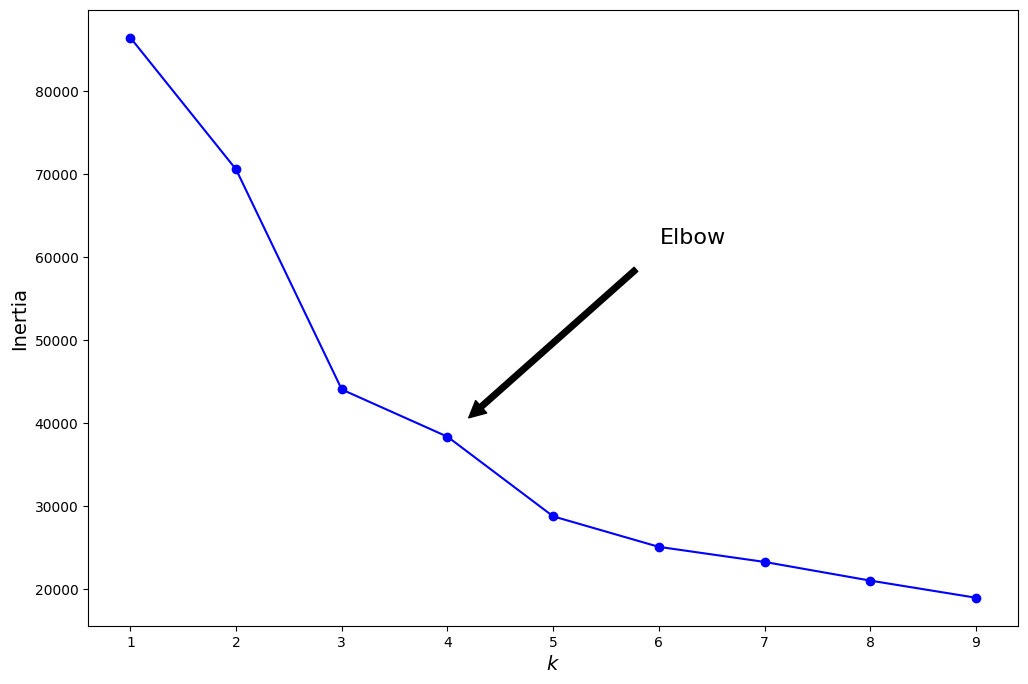

In [ ]:
#Plotting inertia (within-cluster sum of squares)
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

The optimal value of 'k' is 4. As we can see from the above graph that the inertia (WCSS) starts to reduce from 4 through 9.

### <font color='blue'>Implementing 'KMeans'</font>

In [ ]:
# Set k=4 as per prior analysis and implementing KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# predicting the KMeans values and updating the dataframe
y_pred = kmeans.fit_predict(scaled_features)
scaled_features['Y_Predicted'] = y_pred

### <font color='blue'> Evaluation of KMeans</font>

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Compute TSS
tss = np.sum(np.var(scaled_features, axis=0) * scaled_features.shape[0])

# Compute WCSS from KMeans model
wcss = kmeans.inertia_

# Compute BCSS
bcss = tss - wcss  # This should always be positive

# Debugging prints
print(f"WCSS (Within-Cluster Sum of Squares): {wcss:.2f}")
print(f"TSS (Total Sum of Squares): {tss:.2f}")
print(f"BCSS (Between-Cluster Sum of Squares): {bcss:.2f}")
print(f"BCSS/TSS Ratio: {bcss / tss:.2f}")

# Compute Silhouette Score
silhouette_avg = silhouette_score(scaled_features, scaled_features['Y_Predicted'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

WCSS (Within-Cluster Sum of Squares): 34097.77
TSS (Total Sum of Squares): 236713.20
BCSS (Between-Cluster Sum of Squares): 202615.44
BCSS/TSS Ratio: 0.86
Silhouette Score: 0.65


Silhouette Score: 0.65 and BCSS/TSS Ratio: 0.86 shows that the clustering is Excellent. However, we need to examine the scatterplot for cross-verification.

In [ ]:
#Visualising the KMeans using PCA
from sklearn.decomposition import PCA
# PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Attaching labels for data points
labels = scaled_features['Y_Predicted']

# Create DataFrame
pca_df = pd.DataFrame(data=np.vstack((pca_data.T, labels)).T, columns=("1st_principal", "2nd_principal", "label"))

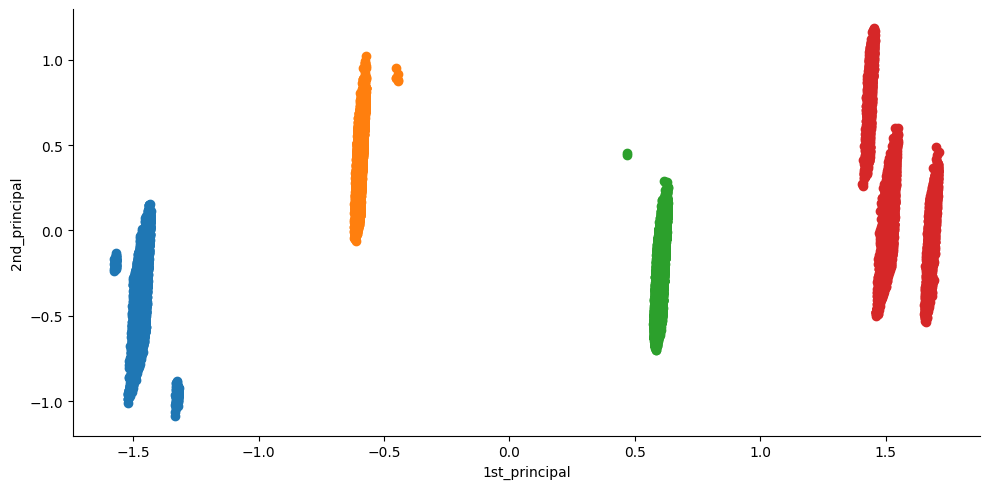

In [ ]:
#Creating PCA components with labels Visualization
g = sns.FacetGrid(pca_df, hue="label",height=5 ,aspect= 2)
g.map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

The scatterplot says that each cluster differ from each other in some ways. However, we need further analysis to identify these unique traits.

In [ ]:
#Polar plot to identify the characteristics of each clusters
polar = scaled_features.groupby("Y_Predicted").mean().reset_index()
polar = pd.melt(polar, id_vars=["Y_Predicted"])
polar.head(4)

,Y_Predicted,variable,value
0,0,orgyear,0.442022
1,1,orgyear,0.589370
2,2,orgyear,0.536892
3,3,orgyear,0.399698


In [ ]:
#Plotting the polar diagram for learning the cluster characteristics
import plotly.express as px
fig = px.line_polar(polar, r="value", theta="variable", color="Y_Predicted", line_close=True,height=700,width=800)
fig.show()

**Characteristics of each cluster using KMeans**

Cluster 0 - These are the people with highest ctc with no prominent roles.

Cluster 1 - These are the clusters in which individuals with lower ctc.

Cluster 2 - In these cluster people falls in an average category. In fact, characteristics of Cluster 2 lies in between Cluster 0 and Cluster 1. This means their income is greater than that of Cluster 1 and less than that of Cluster 0. Additionally, they do not have any prominent roles.

Clster 3 - All of the individuals with prominent roles belongs to this category. Roles like Datascience, Data analyst, software developers and so on belongs to this category.

# <font color='blue'>Hierarchical Clustering</font>

### <font color='blue'>Implementing Dendrogram for optimal 'k'</font>

Hierarchical clustering works on the principle that each datapoint is individual cluster which then merge with other datapoints using the distance to form bigger clusters. Furthermore, centroid distance between clusters with smaller distance merge togather to form bigger clusters and then it grows further.

To explain the concept I have reduced the size of the dataset. As I was experiencing a lot of session crashes.

In [ ]:
# Since the size of the training dataset is higher, we need to extract few samples to build the hierarchical clustering
train_sample = scaled_features.sample(n=1000, random_state=42)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
Z = sch.linkage(train_sample, method='ward')

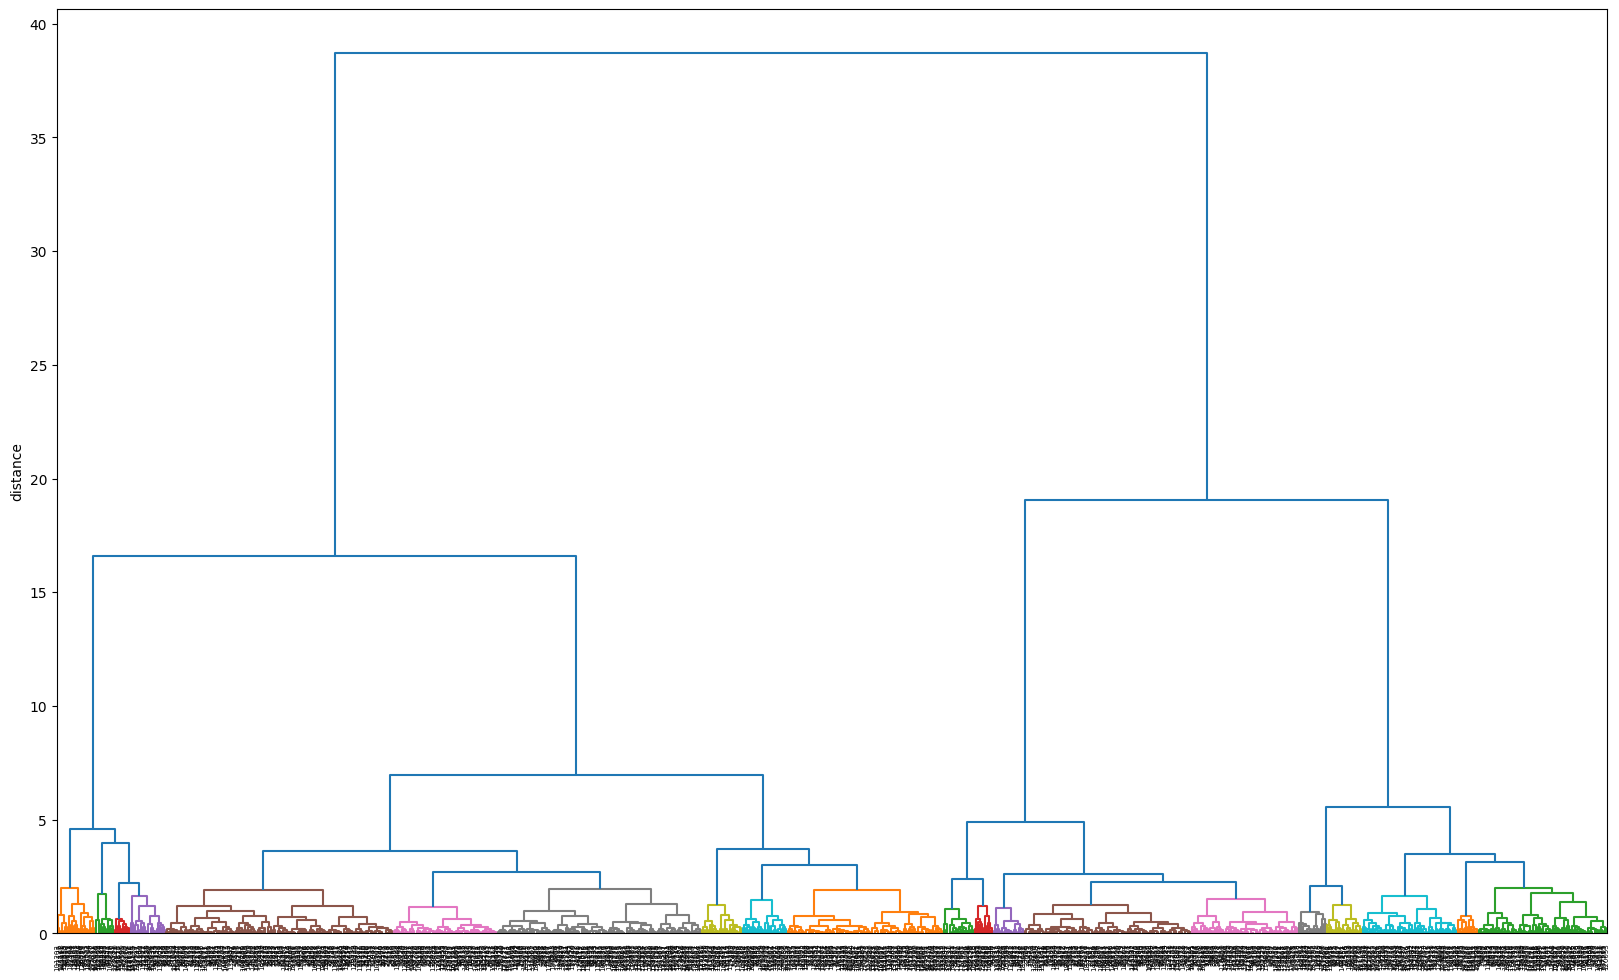

In [ ]:
#Plotting the dendrogram
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=train_sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.show()

As from the above picture we can conclude that the optimal number for 'k' is 4 at a distance of 8.

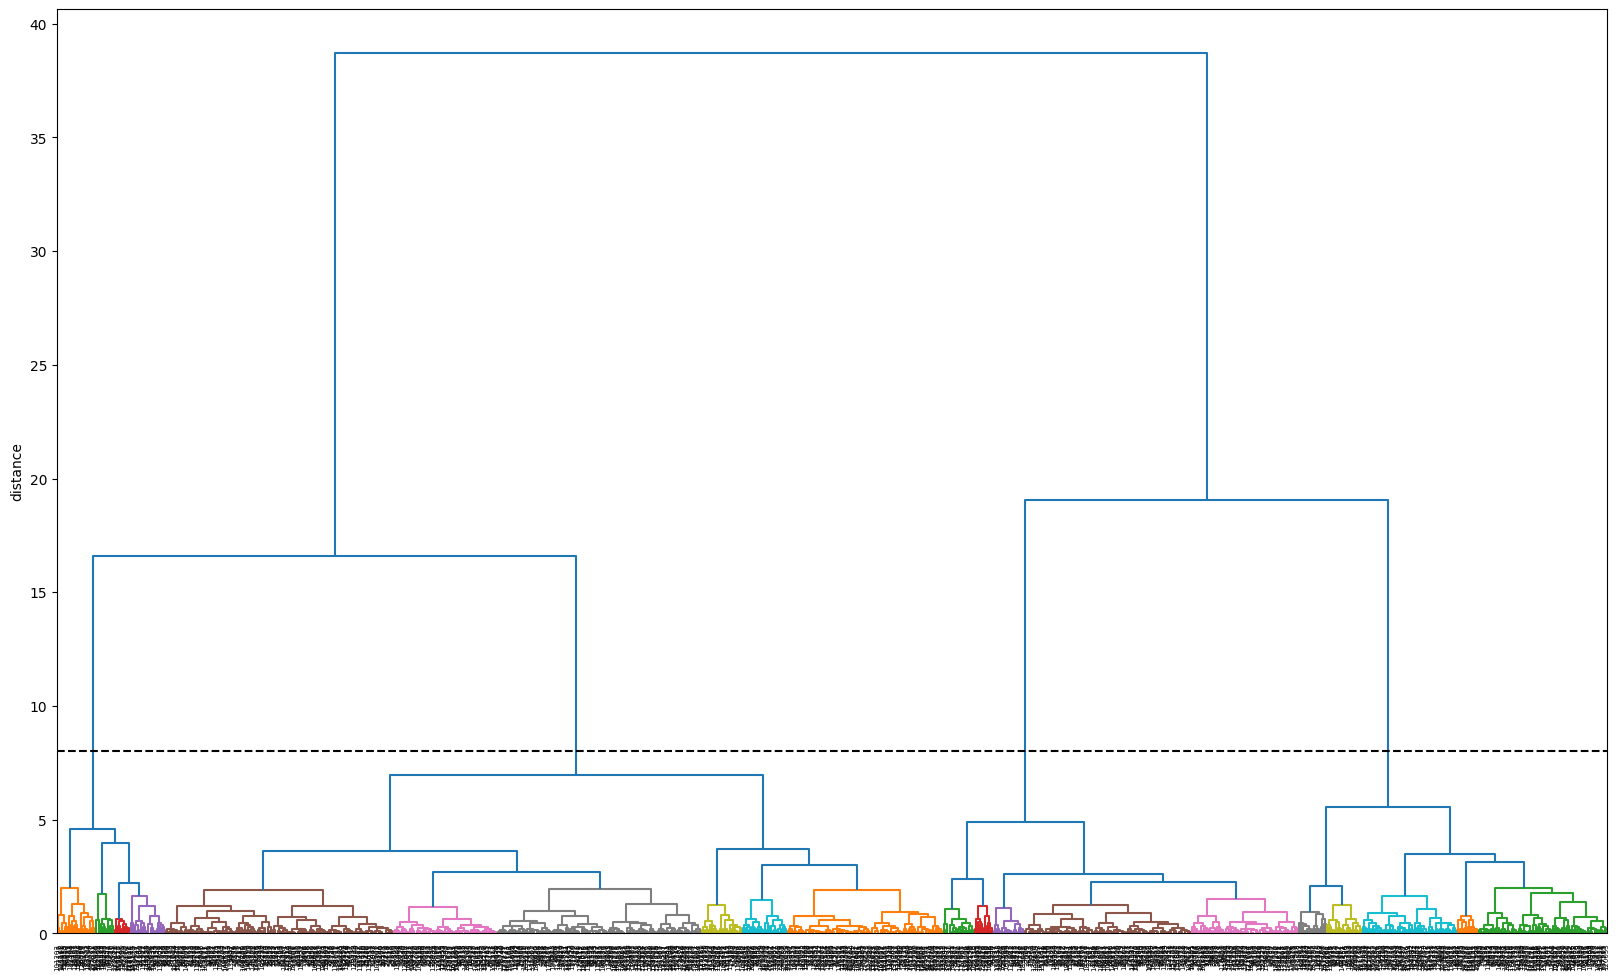

In [ ]:
#Dendrogram with a horizontal line to find out the number of clusters.
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=train_sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=8, color='k', linestyle='--')
ax.set_ylabel('distance')
plt.show()

### <font color='blue'> Implementing Hierarchical Cluster </font>

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering
# create clusters
hierarchy_clus = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'ward')
hierarchy_clus.fit(train_sample)
y_pred = hierarchy_clus.fit_predict(train_sample)

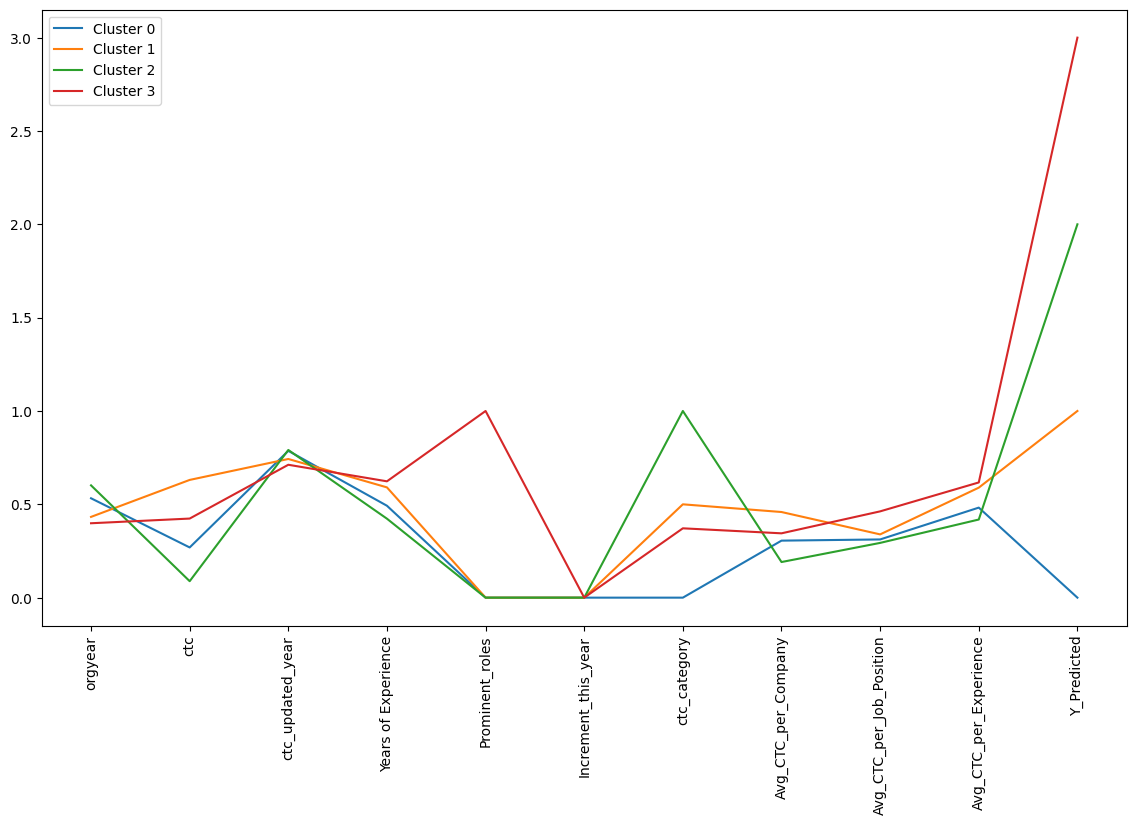

In [ ]:
#Plot a line graph to see the characteristics of the clusters
train_sample['label'] = pd.Series(y_pred, index=train_sample.index)

clustered_df = train_sample.groupby('label').mean()

labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

**Characteristics of Cluster using Hierarchical Cluster**

Cluster 0 - Individuals in these clusters are average people. They have both charactersitics of cluster 2 and cluster 1. They are average people with average income and no prominent roles. Cluster 0 is same as **cluster 2 in KMeans.**

Cluster 1 - These are the individuals with higher ctc and no prominent. We have identified that these cluster similar to the **cluster 0 in KMeans.**

Cluster 2 - These are the clsuters with extremely low ctc which is similar to **cluster 1 in KMeans.**

Cluster 3 - All the individuals in this cluster have prominent roles like software developer, data analyst, data scientist. This cluster is similar to the **Cluster 3 in KMeans.**

### <font color='blue'>T-SNE Visualisation of the Hierarchical Clustering</font>

In [ ]:
from sklearn.manifold import TSNE

# t-SNE dimensionality reduction
train_sample['Y_Predicted'] = y_pred
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(train_sample)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(data=np.vstack((tsne_data.T, train_sample['Y_Predicted'])).T, columns=("Dim_1", "Dim_2", "label"))

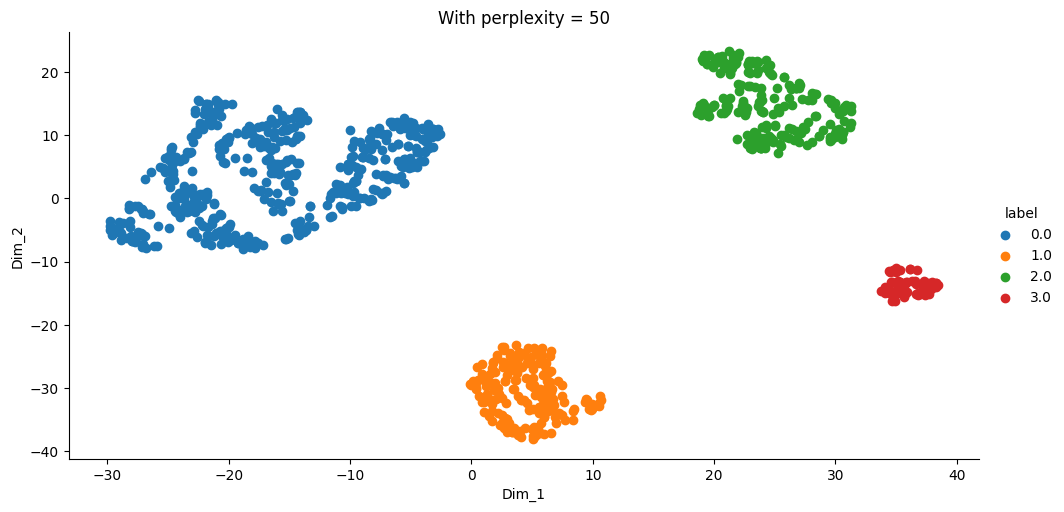

In [ ]:
# Plot using Seaborn
sns.FacetGrid(tsne_df, hue="label", height=5 ,aspect= 2).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

# <font color='blue'>Further Analysis</font>

In [ ]:
#Update the original dataset with clusters
df['Cluster'] = scaled_features['Y_Predicted']
df.head()

,orgyear,ctc,ctc_updated_year,Years of Experience,Prominent_roles,Increment_this_year,ctc_category,Avg_CTC_per_Company,Avg_CTC_per_Job_Position,Avg_CTC_per_Experience,Cluster
0,2016,1100000.0,2020.0,9.0,0.0,0.0,0.0,1.115667e+06,8.397502e+05,1.003364e+06,2
1,2018,449999.0,2019.0,7.0,0.0,0.0,2.0,1.074297e+06,1.060337e+06,8.872086e+05,1
2,2015,2000000.0,2020.0,10.0,0.0,0.0,1.0,2.000000e+06,1.246683e+06,1.072411e+06,0
3,2017,700000.0,2019.0,8.0,0.0,0.0,0.0,1.525317e+06,1.246683e+06,9.280243e+05,2
4,2017,1400000.0,2019.0,8.0,0.0,0.0,0.0,9.400000e+05,1.060337e+06,9.280243e+05,2


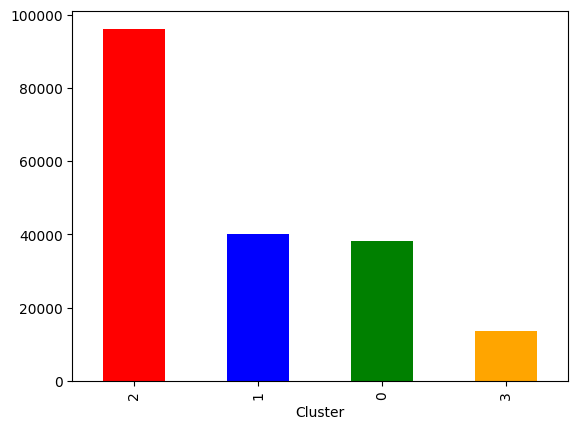

In [ ]:
#Checking which is the primary cluster
df['Cluster'].value_counts().plot(kind='bar',color=['red','blue','green','orange'])
plt.show()

Kmeans cluster shows that most of the individuals fall under cluster 2 and this is the primary cluster. They have characteristics between cluster 1 and cluster 0.

In [ ]:
#Finding the minimum and maximum values for orgyear and ctc_updated_year based on Cluster
print(df.groupby('Cluster')['orgyear'].agg(['min','max']))
print(df.groupby('Cluster')['ctc_updated_year'].agg(['min','max']))

          min   max
Cluster            
0        2005  2025
1        2005  2025
2        2005  2025
3        2005  2025
            min     max
Cluster                
0        2015.0  2021.0
1        2015.0  2021.0
2        2015.0  2021.0
3        2015.0  2021.0


No special pattern can be found with respect to oryear and ctc_updated_year.

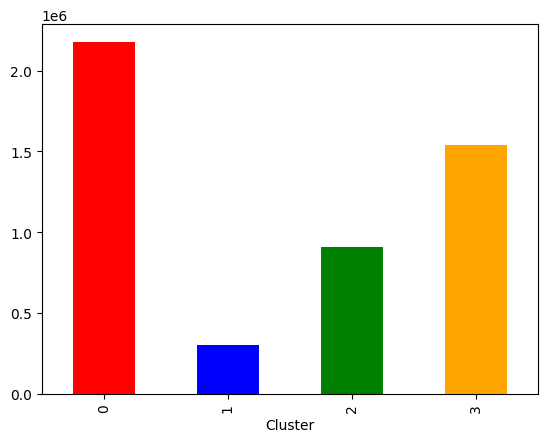

In [ ]:
#Average ctc based on cluster
df.groupby('Cluster')['ctc'].mean().plot(kind='bar',color=['red','blue','green','orange'])
plt.show()

The cluster 0 has a highest average ctc and cluster 1 has the least average ctc. The cluster 2 lies in between cluster 0 and 1.

# <font color='blue'>Insights and Recommendations</font>

> We have identified that the primary cluster is 2 with average ctc and cluster 3 has all the prominent roles.

> Cluster 0 has the highest ctc and cluster 1 has the lowest ctc.

> The optimal value of the k is 4 for Kmeans clustering. It is same as the dendrogram used in the Hierarchical clustering.

> The clusters identified in the KMeans is as same as the clusters identified in the hierarchical clustering.

> The silohutte score and BCSS/TSS ratio suggest that we have formed a good clustering with separable nature.

> The cluster with least number of datapoints is 3 which contains most of the prominent roles. Since, prominent roles are manually provided we need to figure out more prominent roles for a genuine analysis.

> The process needs to be iterated for more generalised views. This means that, we need more features to identify the characteristics of each clusters.